# <center> <b> BANK MARKETING CAMPAIGN<br>
    

  <b> <span style="color: #008B8B; font-size: 1.5em;"> TABLE OF CONTENTS
    
* [INTRODUCTION](#0)
* [1. OVERVIEW.](#1) 
    * [1.1. About the dataset.](#1.1.) 
    * [1.2. Data Analysis.](#1.2.) 
    * [1.3. Data Cleaning and transformation.](#1.3.)
* [2. EXPLORATORY DATA ANALYSIS.](#2) 
    * [2.1. General.](#2.1.) 
    * [2.2. Data Visualization.](#2.2) 
    * [2.3. Customer Information.](#2.3)
    * [2.4. Recommendation.](#2.4)
* [3. MODEL DEVELOPMENT.](#3) 
    * [3.1. Preprocessing.](#3.1)
    * [3.2. Model Building.](#3.2)
    * [3.3. Model Tuning.](#3.3)<br>
* [CONCLUSION.](#4)


# Library

In [65]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 50)  # or 1000

import matplotlib.ticker as mtick
import matplotlib.patches as mpatches


from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.metrics import (accuracy_score, classification_report, f1_score,
                             precision_recall_curve, precision_score,
                             recall_score, roc_auc_score, roc_curve, RocCurveDisplay)
from sklearn.model_selection import (GridSearchCV, KFold, RandomizedSearchCV,
                                     ShuffleSplit, StratifiedKFold,
                                     StratifiedShuffleSplit, cross_val_predict,
                                     cross_val_score, learning_curve,
                                     train_test_split)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler,OneHotEncoder, MinMaxScaler

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier


## INTRODUCTION <a class="anchor" id="0"></a>

 In the past few decades, banks have experienced some problems in selling their term-deposit products to new clients (Elsalamony, 2014). This is mainly because it is difficult for banks to figure out who their target customers are and many factors will affect a customer’s decision to purchase a term deposit (Moro et al., 2014). Many banks have started to leverage their substantial customer data to gain insight into customer behavior and buying preferences to address these issues and improve their marketing effectiveness (Moro et al., 2014).  

Marketing data analytics is one of the most prominent applications of data science and machine learning in economics and business. Predicting the outcome of a marketing campaign for each client and clarifying the factors that influence campaign results helps figure out how to execute marketing campaigns more effectively. Understand customer segments, use term deposit customer data to help identify profiles of customers who are more likely to purchase products, and develop marketing campaigns that potential customers. 
    
For that reason, we have been motivated to carry out research on the dataset of the bank's marketing campaign data and performed analytics by using classification technique, especially most known machine learning models, which helps the bank optimize its marketing campaigns to attract more customers to subscribe to term deposits.

## 1. OVERVIEW. <a class="anchor" id="1"></a>

### 1.1. About the dataset. <a id="1.1."></a>

The data is related to direct marketing campaigns (phone calls) of a BankX including 45211 observations, each with 17 attributes. The target y attribute shows the result if clients will subscribe the term deposit or not. The target feature is coded as “yes” to indicate client will subscribe a term deposit while “no” means client will not subscribe the term deposit.<br>
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014] bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
The BankX Marketing Dataset includes information about: <br>
#### Bank client data:
1 - age (numeric) <br>
2 - job : type of job (categorical) <br>
3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced / widowed) <br>
4 - education (categorical: "unknown","secondary","primary","tertiary") <br>
5 - default: has credit in default? (binary: "yes","no") <br>
6 - balance: average yearly balance, in euros (numeric) <br>
7 - housing: has housing loan? (binary: "yes","no") <br>
8 - loan: has personal loan? (binary: "yes","no") <br>
#### Related with the last contact of the current campaign:
9 - contact: contact communication type (categorical: "unknown","telephone","cellular") <br>
10 - day: last contact day of the month (numeric) <br>
11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec") <br>
12 - duration: last contact duration, in seconds (numeric) <br>
#### Other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) <br>
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted) <br>
15 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")<br>

#### Output variable (target value):
17 - y - has the client subscribed a term deposit? (binary: "yes","no")

### First look at the data

In [63]:
#reading the dataset

df = pd.read_csv('C:\\Users\\Admin\Desktop\\Data Glacier\\Week7\\bank-additional-full.csv', delimiter = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df = pd.read_csv(filename, index_col= 0)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


- The raw data contains <b> 45211 rows </b> (customers) and <b> 17 columns </b> (features).

In [8]:
df.shape

(41188, 21)

In [9]:
import os
file_size = os.path.getsize('C:\\Users\\Admin\Desktop\\Data Glacier\\Week7\\bank-additional-full.csv')
print("The file size is:{} bytes".format(file_size))

The file size is:5834924 bytes


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

There is a single binary output variable that denotes “yes” or “no” revealing the outcomes of the marketing phone calls. "Yes" means that a customer subscribed to term deposits.

In [11]:
#reading the dataset
df2= pd.read_csv('C:\\Users\\Admin\Desktop\\Data Glacier\\Week7\\bank-additional.csv', delimiter = ';')
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [12]:
# number of rows and columns
df2.shape

(4119, 21)

In [13]:
#the missing values
df2.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [14]:
file_size = os.path.getsize('C:\\Users\\Admin\Desktop\\Data Glacier\\Week7\\bank-additional.csv')
print("The file size is:{} bytes".format(file_size))

The file size is:583898 bytes


### 1.2. Data Analysis. <a id="1.2."></a>

In [38]:
#find percentage of missing values for each column
missing_values = df.isnull().mean()*100

missing_values.sum()

0.0

As per the observations in the dataset,there is no missing values. Each represents an existing customer that the bank reached via phone calls.***In the initial look, there are no missing values.***

For each observation, the dataset records 16 input variables that stand for both qualitative and quantitative attributes of the customer, such as age, job, housing and personal loan status, account balance, and the number of contacts.
There is no missing value in this dataset. Nevertheless, there are values like “unknown” which are helpless just like missing values. Thus, these ambiguous values are changing to null values.

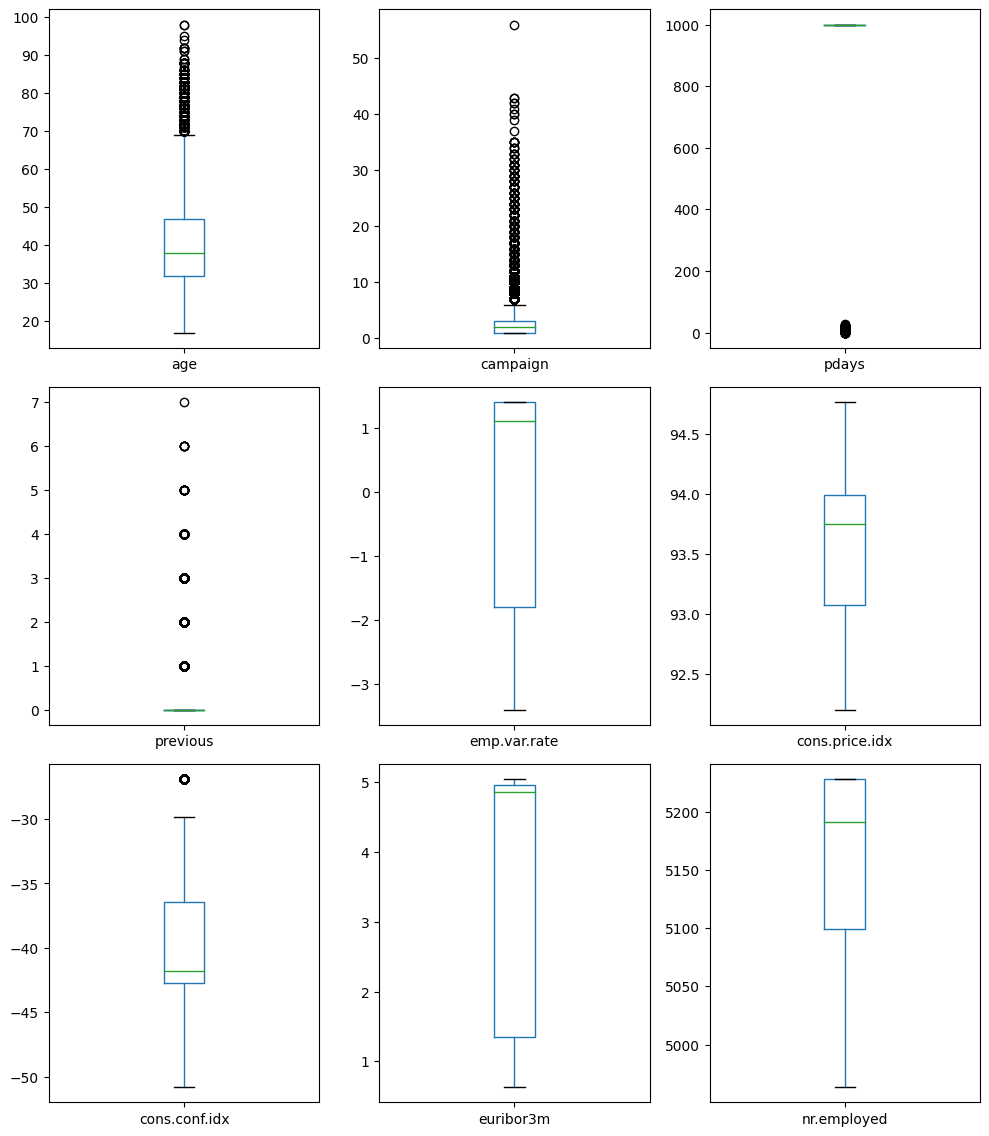

In [17]:
#outlier detection

cols = ['age', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']

       
plt.figure(figsize=(10,15))

for i, col in enumerate(cols):
    plt.subplot(4,3,i+1)
    df.boxplot(col)
    plt.grid()
    plt.tight_layout()

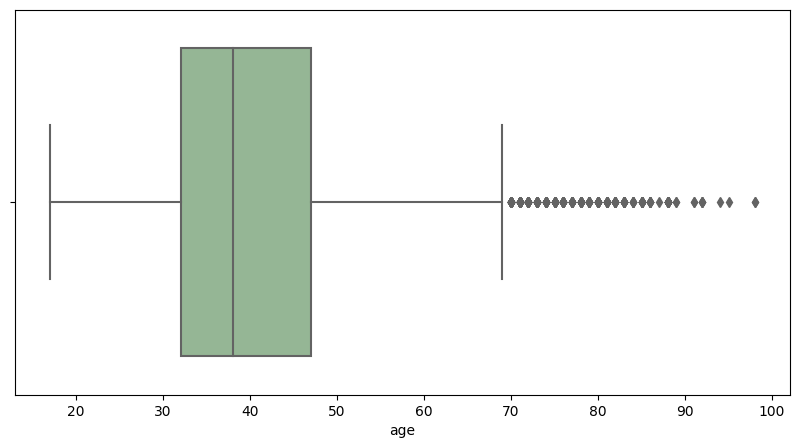

In [19]:
column = ['age']

plt.figure(figsize=(22,5))
n = 1
for col in column:
    ax = plt.subplot(1,2,n)
    sns.boxplot(x=df[col], color='#8FBC8F')
    plt.xlabel(col)
    n += 1
    plt.show()

#### <u>Observation</u>: 
Most of the numerical columns are not normally distributed and some of them have outliers. We can see from the above boxplot that there are outliers available in certain variables.

In [21]:
#checking statistics of outlier features

df[['age', 'pdays', 'campaign', 'previous']].describe()

,age,pdays,campaign,previous
count,41188.00000,41188.000000,41188.000000,41188.000000
mean,40.02406,962.475454,2.567593,0.172963
std,10.42125,186.910907,2.770014,0.494901
min,17.00000,0.000000,1.000000,0.000000
25%,32.00000,999.000000,1.000000,0.000000
50%,38.00000,999.000000,2.000000,0.000000
75%,47.00000,999.000000,3.000000,0.000000
max,98.00000,999.000000,56.000000,7.000000


### Age
checking statistics each outlier features

Text(0.5, 0, 'y:target variable')

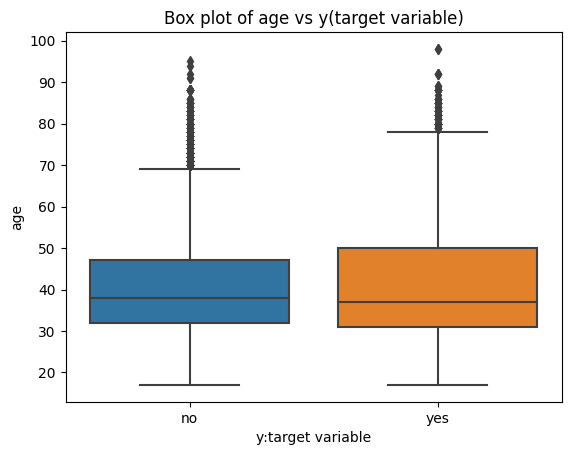

In [22]:
sns.boxplot(y=df['age'], x=df['y'])
plt.title('Box plot of age vs y(target variable)')
plt.xlabel('y:target variable')

In [23]:
df.age.describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

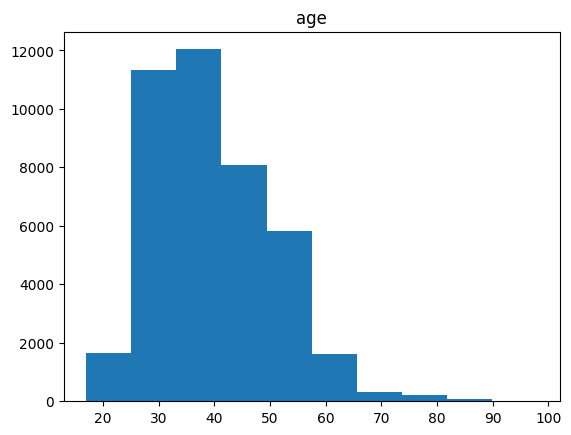

In [24]:
# age column
plt.hist(df['age'])
plt.title('age')
plt.show()

#### <u>Observation</u>: 
- The max value of age id 98
- Medium age of People are around **30 - 50** who all are having higher success rate.
- Proportionally there are more subscribers aged between **less than 30** and **more than 60 years** old than between those from 30 to 60 years old.


### Pdays

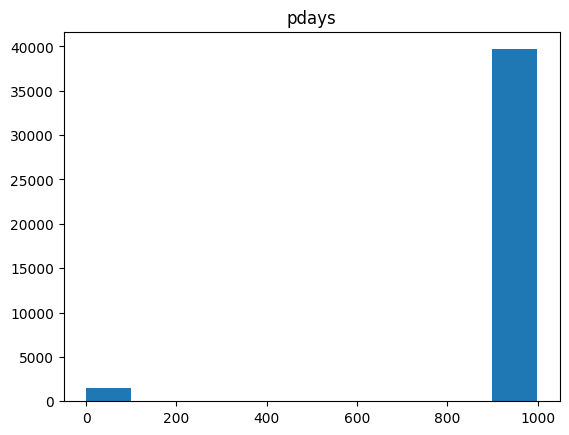

In [25]:
plt.hist(df['pdays'])
plt.title('pdays')
plt.show()

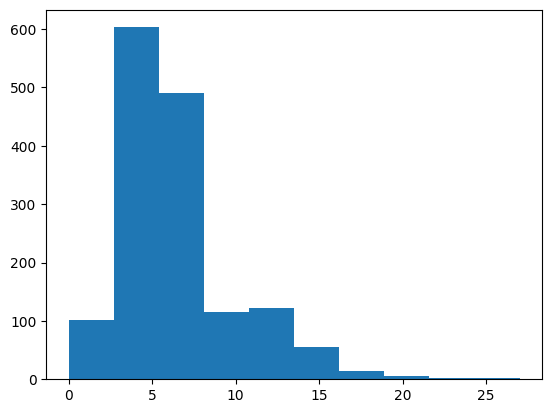

In [26]:
plt.hist(df.loc[df.pdays != 999, 'pdays'])
plt.show()

In [27]:
len(df[df['pdays'] ==999])  / len(df) * 100

96.32174419733903

In [28]:
df.pdays.describe()

count    41188.000000
mean       962.475454
std        186.910907
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

#### <u>Observation</u>: 
- The attribute pdays seems to be important feature as there is a clear distinction in quartile ranges of pdays for target variable yes and no.
- Mean of pdays is **962.47**
- There are outliers as we can see from boxplot.

### Previous

Text(0.5, 0, 'y:target variable')

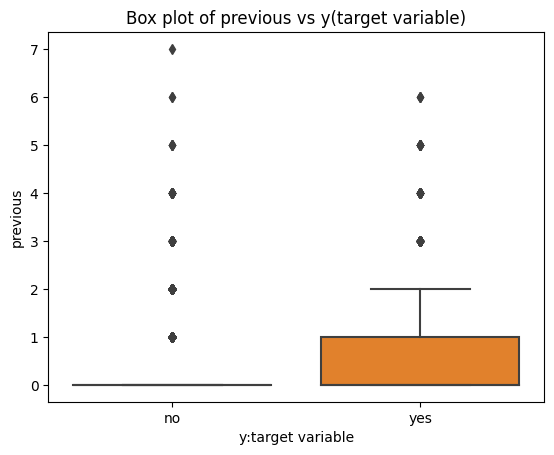

In [29]:
sns.boxplot(y=df['previous'], x=df['y'])
plt.title('Box plot of previous vs y(target variable)')
plt.xlabel('y:target variable')

In [30]:
df.previous.describe()

count    41188.000000
mean         0.172963
std          0.494901
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64

#### <u>Observation</u>: 
- Duration have a mean of **0.17 and standard-deviation 0.50**
- There are outliers points in previous

### Campaign

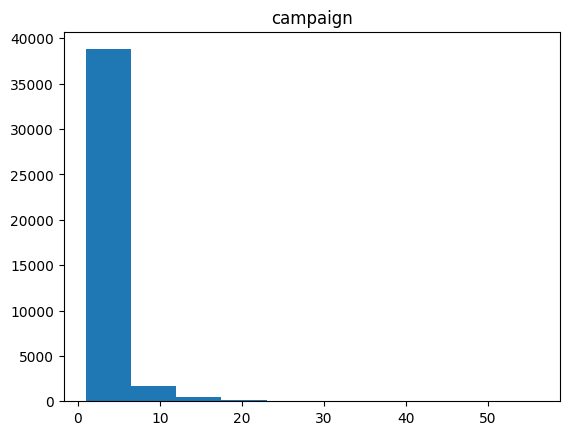

In [31]:
plt.hist(df['campaign'])
plt.title('campaign')
plt.show()

In [32]:
len(df[df['campaign'] > 20])  / len(df) * 100

0.3811789841701467

In [33]:
df.campaign.describe()

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

#### <u>Observation</u>: 
- campaign have a mean of **2.56 and standard-deviation 2.77**
- There are outliers points in previous

### Imputation using median

From df.describe(), the median is the 50% value, which is 38

In [34]:
#The value which is outside the whisker
print(df['age'].quantile(0.95))

58.0


In [35]:
#replacing the values which are greater than the 95th percentile
df['age1'] = np.where(df['age'] > 58, 40, df['age'])
df[['age', 'age1']].describe()

,age,age1
count,41188.00000,41188.000000
mean,40.02406,38.992206
std,10.42125,8.858684
min,17.00000,17.000000
25%,32.00000,32.000000
50%,38.00000,38.000000
75%,47.00000,45.000000
max,98.00000,58.000000


After median imputation, the maximum value has now become 58

### Imputation using mean
From df.describe(), the mean is 40.02

In [36]:
#replacing the values which are greater than the 95th percentile
df['age2'] = np.where(df['age'] > 58, 40.02, df['age'])
df[['age', 'age1','age2']].describe()

,age,age1,age2
count,41188.00000,41188.000000,41188.000000
mean,40.02406,38.992206,38.993011
std,10.42125,8.858684,8.858776
min,17.00000,17.000000,17.000000
25%,32.00000,32.000000,32.000000
50%,38.00000,38.000000,38.000000
75%,47.00000,45.000000,45.000000
max,98.00000,58.000000,58.000000


The statistics of the dataset after median and mean imputation remain roughly the same

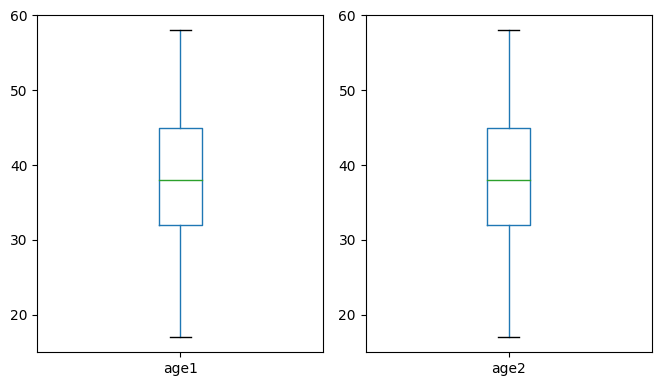

In [37]:
#outlier detection  after imputation
import matplotlib.pyplot as plt
cols = ['age1','age2']
plt.figure(figsize=(10,15))
for i, col in enumerate(cols):
    plt.subplot(4,3,i+1)
    df.boxplot(col)
    plt.grid()
    plt.tight_layout()

### 1.3. Data Cleaning and transformation. <a id="1.3."></a>

#### 1. Deal with missing data
There is no missing value in this dataset. Nevertheless, there are values like “unknown” which are helpless just like missing values. Thus, these ambiguous values are removed from the dataset.

In [39]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age1,age2
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,56,56.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,57,57.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,37,37.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,40,40.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,56,56.0


In [40]:
#changing unknown to null values
df.replace("unknown", np.nan, inplace=True)

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age1,age2
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,56,56.0
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,57,57.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,37,37.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,40,40.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,56,56.0


#### 2. Change column names

In [42]:
# change column names
df.rename(columns = {'day_of_week':'day','emp.var.rate':'emp.var','cons.price.idx':'cons.price','euribor3m':'euribor','cons.conf.idx':'cons.conf','nr.employed':'no_emp'}, inplace = True)


#### 3. Check potential errors and consistency

In [43]:
# first, description error: -1 should indicate those that have never been previously contacted  
# second, check consistency with "pdays"
# Move people who was previously contacted but without exact poutcome("failure" or "success") to "others" 
# Move people who have never been contacted to "unknown"

df[(df['poutcome']=='others')&(df['pdays']==-1)] # empty dataset
inconsistent_indices = df[(df['poutcome']=='unknown')&(df['pdays']!=-1)].index
df.iloc[inconsistent_indices]['poutcome']='other'

df[(df['pdays']==-1)&(df['previous']!=0)]#empty dataset
df[(df['pdays']!=-1)&(df['previous']==0)];#empty dataset

#### 4. Creating and transforming data
Some changes were made to the column name, units and data types for easier analysis.

In [44]:
# Step 1: Change column name: 'y' to 'response'
df.rename(index=str, columns={'y': 'response'}, inplace = True)

def convert(df, new_column, old_column):
    df[new_column] = df[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return df[new_column].value_counts()

convert(df, "response_binary", "response")

0    36548
1     4640
Name: response_binary, dtype: int64

In [62]:
# Step 2: Drop column "contact" which is useless
df = df.drop('contact', axis=1)

In [47]:
# Step 3: Change the unit of 'duration' from seconds to minutes
df['duration'] = df['duration'].apply(lambda n:n/60).round(2)

In [48]:
# Step 4: Change 'month' from words to numbers for easier analysis
lst = [df]
for column in lst:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12

#### 5. Filtering

In [49]:
# Step 1: Drop rows that 'duration' < 5s
condition2 = (df['duration']<5/60)
df = df.drop(df[condition2].index, axis = 0, inplace = False)
# Step 2: Drop customer values with 'other' education
condition3 = (df['education'] == 'other')
df = df.drop(df[condition3].index, axis = 0, inplace = False)

## 2. EXPLORATORY DATA ANALYSIS. <a class="anchor" id="2"></a>
To obtain a better understanding of the dataset, the distribution of key variables and the relationships among them were plotted.

### 2.1. General. <a id="2.1"></a>

#### Categorical features.

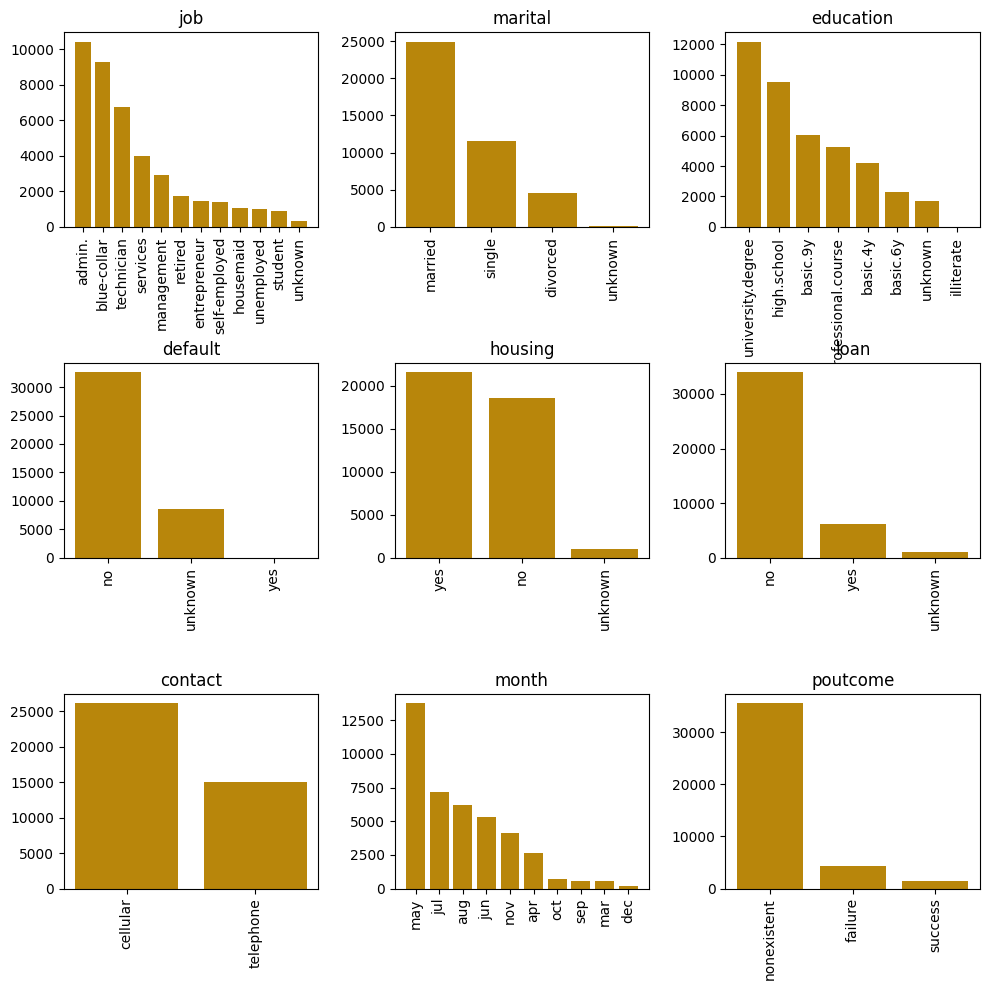

In [61]:
# 9 categoraical features
categorical_col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

fig, axs = plt.subplots(3, 3, sharex = False, sharey = False, figsize = (10, 10))

count = 0
for c in categorical_col:
    value_counts = df[c].value_counts()
    subplot_x = count // 3
    subplot_y = count % 3
    x_pos = np.arange(0, len(value_counts))  
    axs[subplot_x, subplot_y].bar(x_pos, value_counts.values, tick_label = value_counts.index, color = 'darkgoldenrod')
    axs[subplot_x, subplot_y].set_title(c)
    
    for tick in axs[subplot_x, subplot_y].get_xticklabels():
        tick.set_rotation(90)
    count += 1

plt.tight_layout()
plt.subplots_adjust(wspace = 0.3, hspace = 0.7)
plt.show()

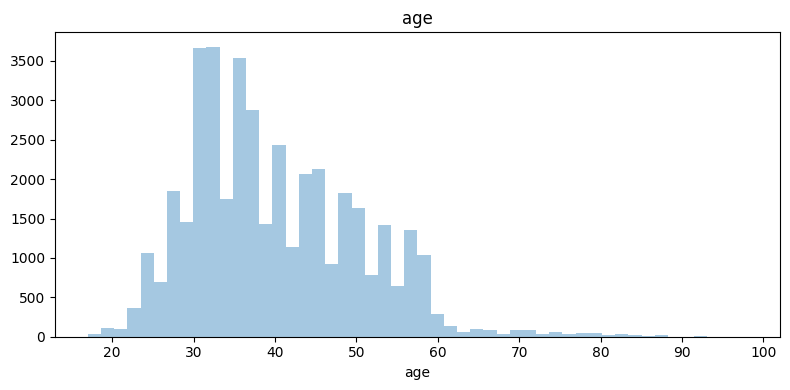

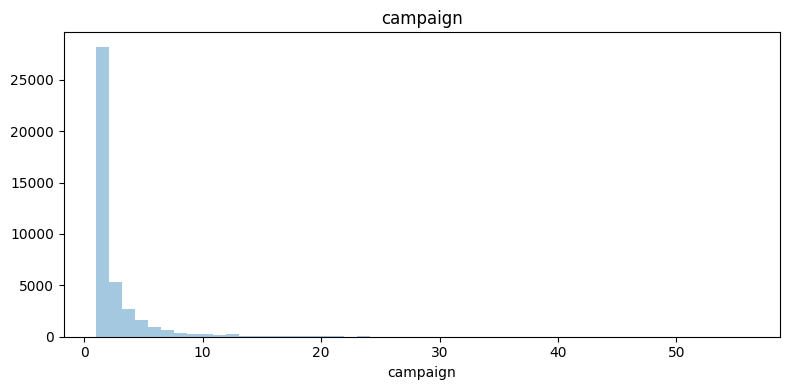

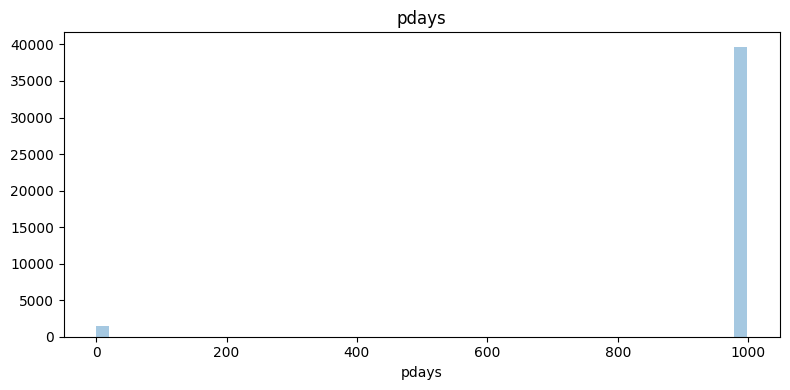

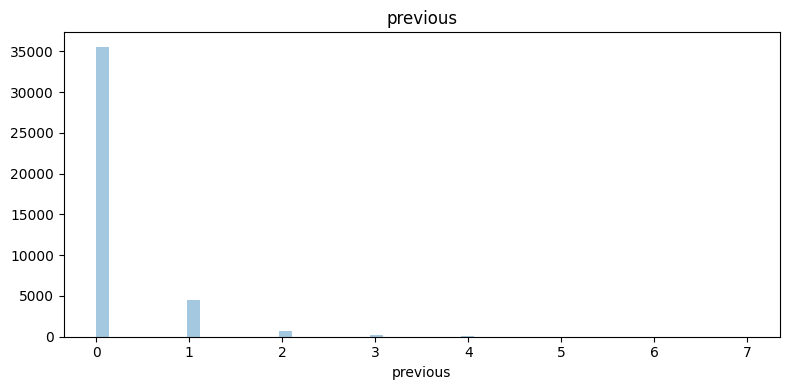

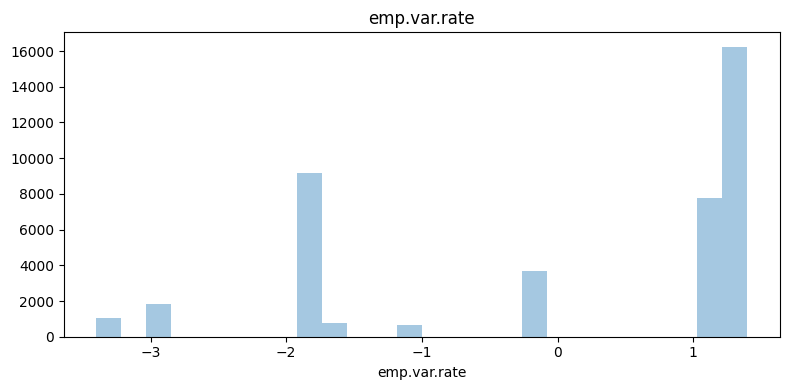

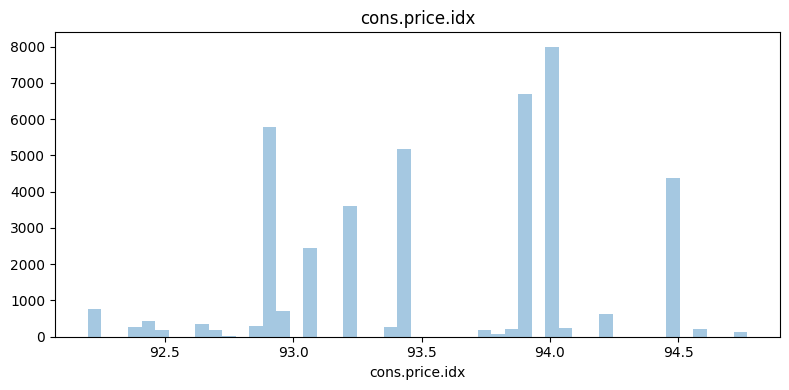

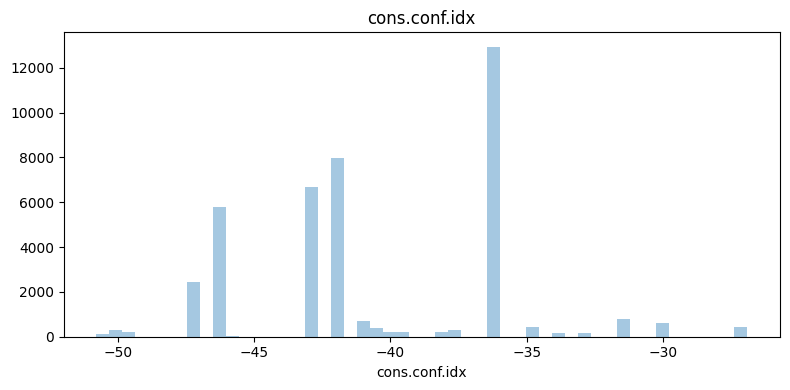

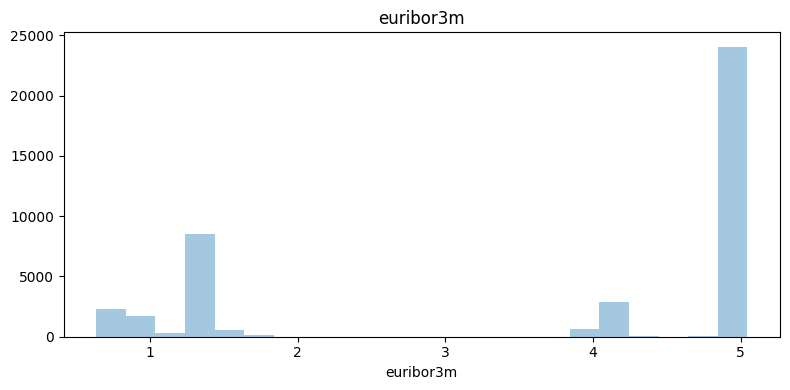

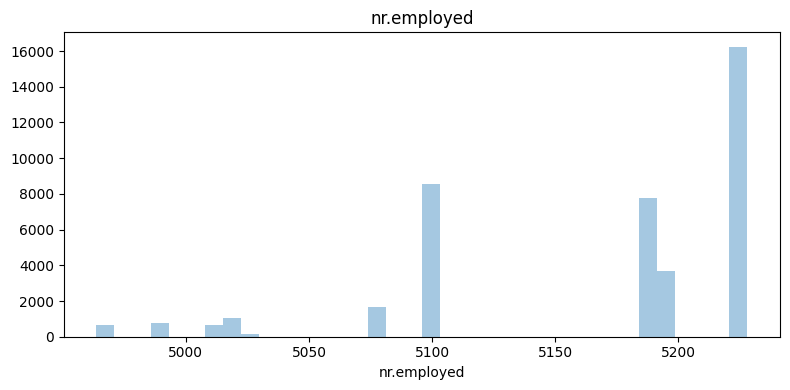

In [66]:
# numerical features
numerical_variables = ['age','campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx','euribor3m',
                      'nr.employed']

for col in numerical_variables:
    plt.figure(figsize=(8,4))
    sns.distplot(df[col], kde = False)
    plt.title(col)
    plt.tight_layout()
    plt.show()

 ### 2.1 Visualize the distribution of 'duration' & 'campaign'

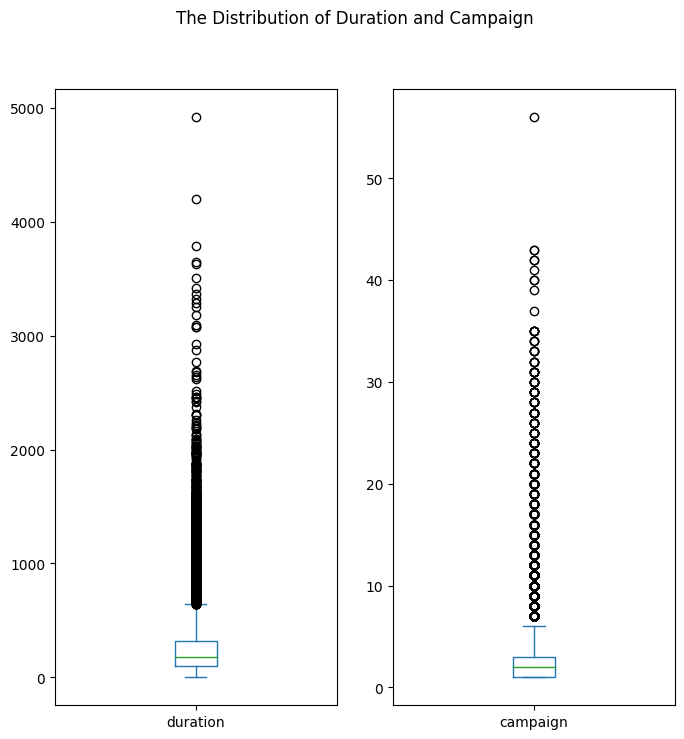

In [67]:
dist_dur_cam = df[['duration','campaign']].plot(kind = 'box', 
                                                      figsize = (8,8),
                                                      subplots = True, layout = (1,2),
                                                      sharex = False, sharey = False,
                                                      title='The Distribution of Duration and Campaign')
plt.show()

**The distribution of duration**: As observed from the box plot, the duration of contact has a median of 3 minutes, with an interquartile range of 1.73 minutes to 5.3 minutes. The left-skewed boxplot indicates that most calls are relatively short. Also, there is a large number of outliers ranging from 10 minutes to 40 minutes, which are worth further study.

**The distribution of campagin**: About half of the clients have been contacted by the bank for the second time, while 25% was first introduced to the term deposit. Most clients have been reached by the bank for one to three times, which is reasonable. However, some clients have been contacted by as high as 58 times, which is not normal. These clients may have some special needs that require frequent contact.

### 1.2 Visualize the relationship between 'duration' & 'campaign': with response result

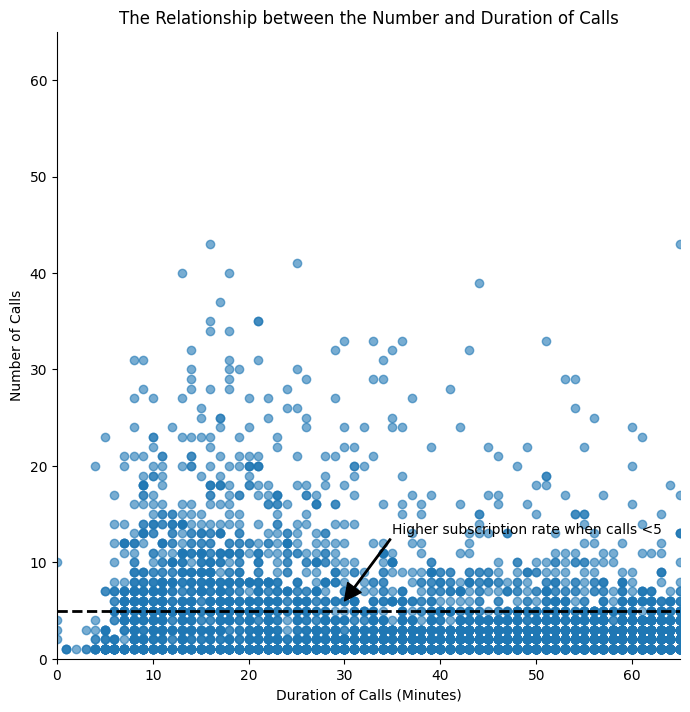

In [68]:
import seaborn as sns
dur_cam = sns.lmplot(x='duration', y='campaign',data = df,
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls')

# Annotation
plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher subscription rate when calls <5',xytext = (35,13),
             arrowprops=dict(color = 'k', width=1),xy=(30,6))
plt.show()

In this scatter plot, clients subscribed to term deposits are denoted as "yes" while those did not are denoted as "no".

As we can see from the plot, “yes” clients and “no” clients are forming two relatively separate clusters. Compared to “no” clients”, “yes” clients were contacted by fewer times and had longer call duration. More importantly, after five campaign calls, clients are more likely to reject the term deposit unless the duration is high. Most “yes” clients were approached by less than 10 times.

This suggests that the bank should resist calling a client for more than five times, which can be disturbing and increase dissatisfaction.

### 1.3 Scatter matrix and Correlation matrix

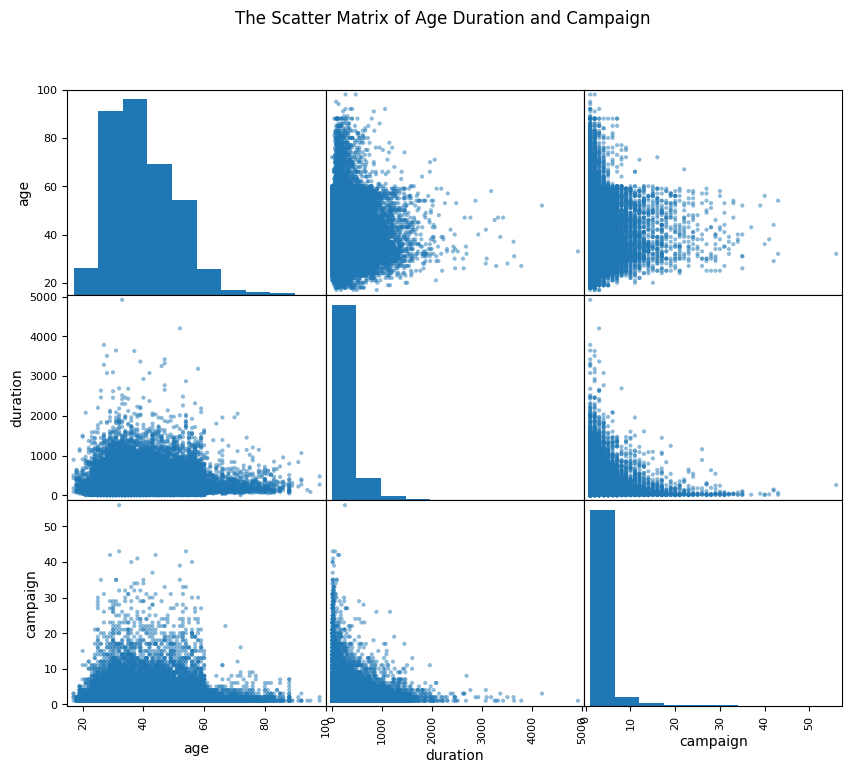

In [69]:
from pandas.plotting import scatter_matrix
matrix = scatter_matrix(df[['age','duration','campaign']],figsize=(10,8))

plt.suptitle('The Scatter Matrix of Age Duration and Campaign')
plt.show()

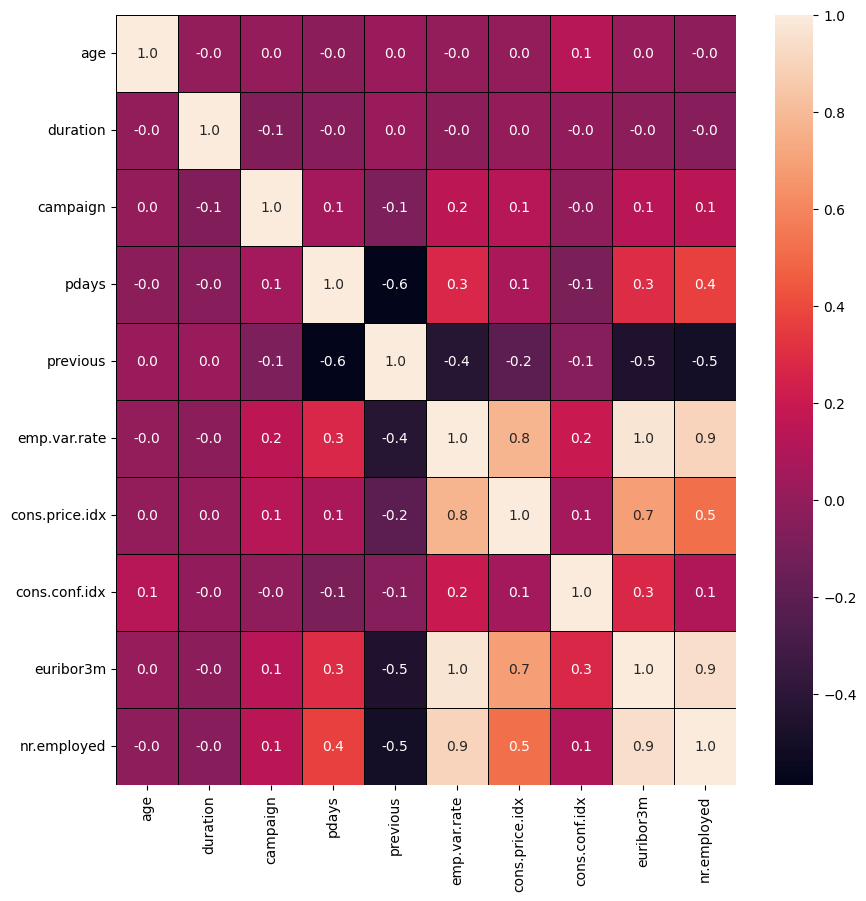

In [70]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax)
plt.show()

#### <u>Observation</u>: 
The scatter matrix does not reveal any clear relationship among age, duration and campaign.

To investigate more about correlation, a correlation matrix was plotted with all qualitative variables. Clearly, “campaign outcome” has a strong correlation with “duration”, a moderate correlation with “previous contacts”, and mild correlations between “month of contact” and “number of campaign”. Their influences on campaign outcome will be investigated further in the machine learning part.

### 2.2. Data Visualization. <a id="2.2"></a>

Since we have much numerical data, let's keep our plots much targetted towards our machine learning models. Also let's figure out which feature importances and prune away least important ones.

####  Campaign vs Month

<BarContainer object of 41188 artists>

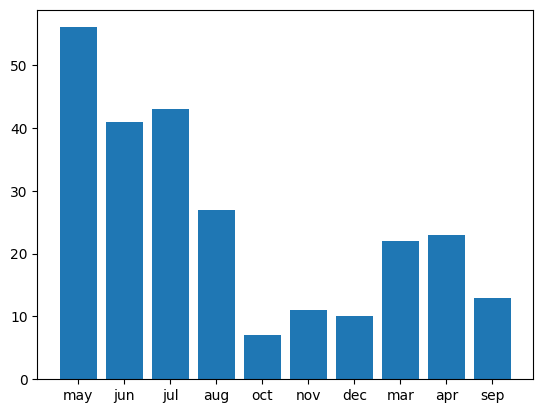

In [71]:
plt.bar(df['month'], df['campaign'])

#### <u>Insights</u>: 
- We can see the campaign were mostly concentrated in the starting of the bank period ( May, June and July)
- Usually education period starts during that time so there is a possibility that parents make deposits in the name of their children
- They also have made their campaign in the end of the bank period.

#### Distribution of Quarterly Indicators

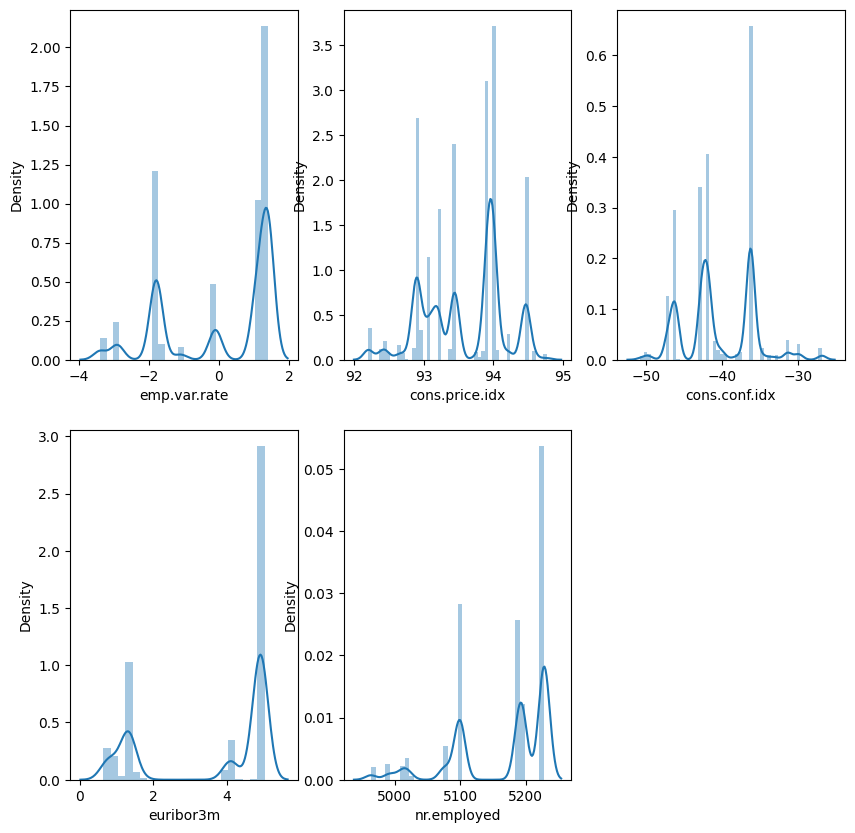

In [73]:
plt.subplot(231)
sns.distplot(df['emp.var.rate'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(df['cons.price.idx'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(df['cons.conf.idx'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.distplot(df['euribor3m'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(df['nr.employed'])
fig = plt.gcf()
fig.set_size_inches(10,10)

#### <u>Insights</u>: 
- We can see there is a high employee variation rate which signifies that they have made the campaign when there were high shifts in job due to conditions of economy
- The Consumer price index is also good which shows the leads where having good price to pay for goods and services may be that could be the reason to stimulate these leads into making a deposit and plant the idea of savings
- Consumer confidence index is pretty low as they don't have much confidence on the fluctuating economy
- The 3 month Euribor interest rate is the interest rate at which a selection of European banks lend one another funds denominated in euros whereby the loans have a maturity of 3 months. In our case the interest rates are high for lending their loans
- The number of employees were also at peak which can increase their income index that could be the reason the campaign targetted the leads who were employeed to make a deposit

#### Marital Status vs Price index

<Axes: xlabel='cons.price.idx', ylabel='marital'>

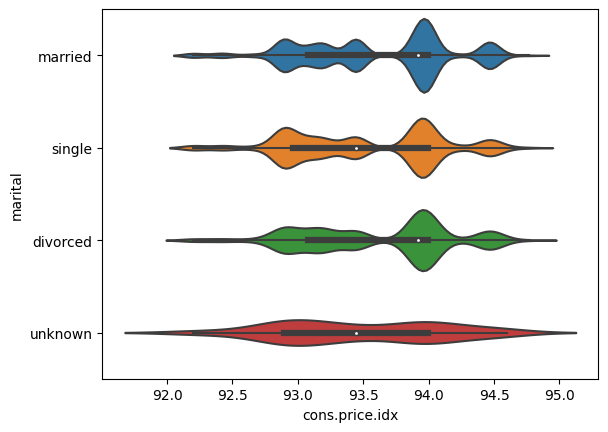

In [74]:
sns.violinplot( y=df["marital"], x=df["cons.price.idx"] )

#### <u>Insights</u>: 
- There are very minute differences among the price index
- Married leads have considerably have an upper hand as they have index contributing as couple

### 2.3. Customer Information. <a id="2.3"></a>

#### 2.3.1. Age.

Text(0.5, 1.0, 'Number of customers by age')

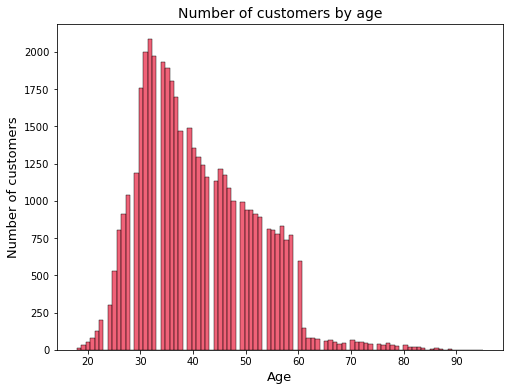

In [16]:
plt.figure(figsize=(8, 6))
age_plt = sns.histplot(data = df[df['age'] <= 100]['age'], color = '#eb2d4b') 
age_plt.set_ylabel('Number of customers', fontsize = 13)
age_plt.set_xlabel('Age', fontsize = 13)
age_plt.set_title('Number of customers by age', fontsize = 14)

#### <u>Observation</u>: 
- The age of the customers using bank services ranges from 18 to 95.
- They are mostly young people, the highest number of customers is in the age of 30s. 

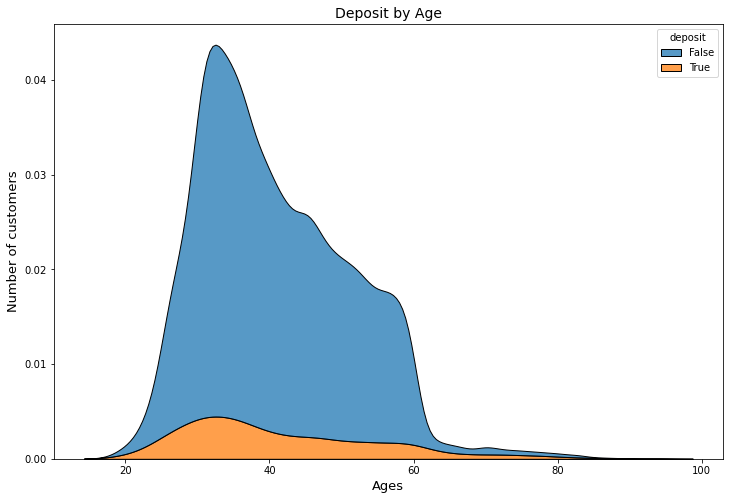

In [17]:
plt.figure(figsize=(12,8))
age_dep = sns.kdeplot(data = df, x = 'age', hue = 'deposit', multiple="stack")
age_dep.set_ylabel('Number of customers', fontsize = 13)
age_dep.set_xlabel('Ages', fontsize = 13)
age_dep.set_title('Deposit by Age', fontsize = 14)
plt.show()

We will divide the age into 3 main groups (Adults, Middle-Aged, The Elderly) to see the impact with Churn:

Young Adults          0.516733
Middle-Aged People    0.443808
The Elderly           0.039459
Name: Age Group, dtype: float64


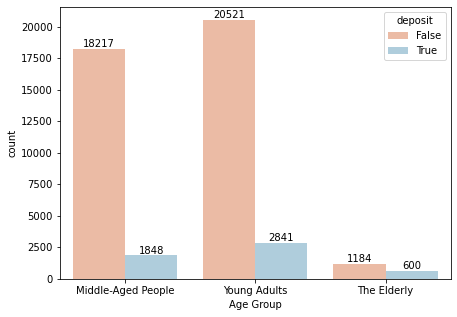

In [18]:
def ages(df):
    if (18 <= df['age'] <= 39) :
        return 'Young Adults'
    elif (40 <= df['age'] <= 59):
        return 'Middle-Aged People'
    elif (60 <= df['age']): 
        return 'The Elderly'
df['Age Group'] = df.apply(ages, axis = 1)
pdraw('Age Group',7,5)

In [19]:
percentsum('Age Group')

,TotalCustumers,DepositQuantity,Ratio
Age Group,,,
The Elderly,1784,600,0.336323
Young Adults,23362,2841,0.121608
Middle-Aged People,20065,1848,0.092101


In [20]:
def gens(df):
    if (18 <= df['age'] <= 25) :
        return 'Gen Z'
    elif (25 < df['age'] <= 40):
        return 'Millennials '
    elif (41 <= df['age'] <= 56): 
        return 'Gen X'
    elif (57 <= df['age'] <= 75): 
        return 'Baby Boomers'
    elif (76 <= df['age'] <= 93): 
        return 'Silent Generation'
    elif (94 <= df['age']): 
        return 'Greatest Generation'
df['Generations'] = df.apply(gens, axis = 1)
percentsum('Generations')

,TotalCustumers,DepositQuantity,Ratio
Generations,,,
Silent Generation,258,116,0.449612
Greatest Generation,3,1,0.333333
Gen Z,1336,320,0.239521
Baby Boomers,3861,721,0.186739
Millennials,23381,2637,0.112784
Gen X,16372,1494,0.091253


#### <u>Observation</u>:
- Most customers are Young Adults and Middle-Aged People and they have not so high deposit percentages, at around 9-12%.
- The Elderly group, though with relatively small quantity, has the highest percentage of deposit customers.
=> Therefore, age group could be a potential feature to predict deposit customers.
- When ages are classified into generations, Silent Generation, Greatest Generation, Gen Z are people who are likely to subscribe to a deposit the most.
*Note that the size of the Greatest Generation is too small to conclude.* 

#### 2.3.2. Job.

blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64


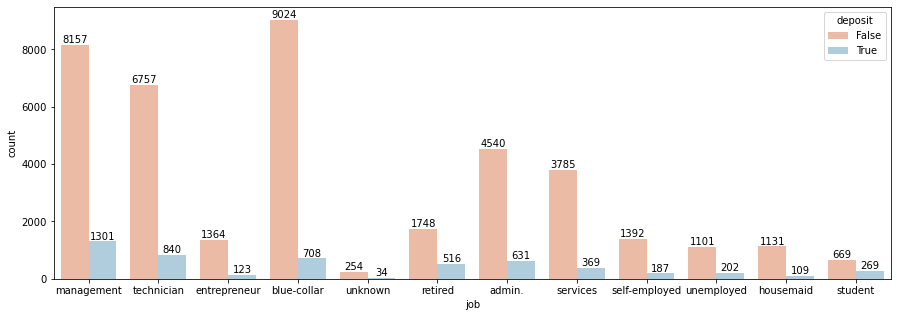

In [21]:
pdraw('job',15,5)

Text(0.5, 1.0, 'Count Plot of job for target variable')

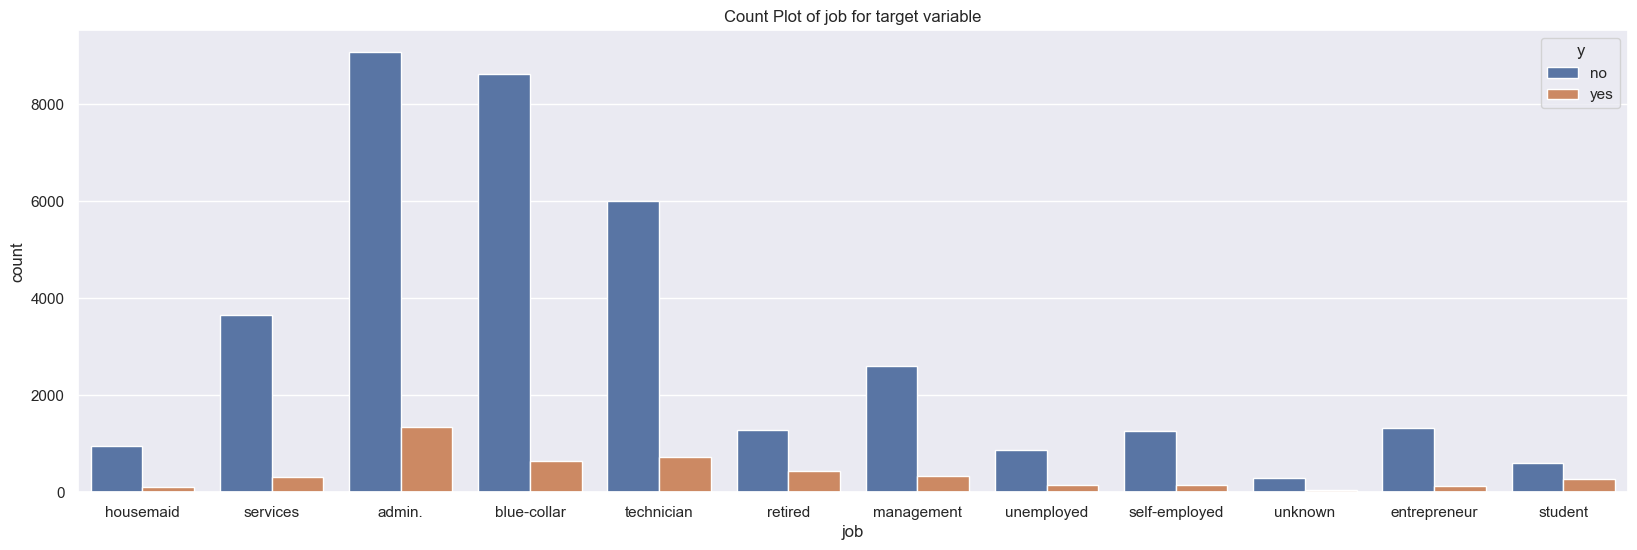

In [81]:
sns.set(rc={'figure.figsize':(20,6)})
sns.countplot(x=df['job'], data=df, hue=df['y'])
plt.title('Count Plot of job for target variable')


Text(0.5, 1.0, 'Jobs by Age')

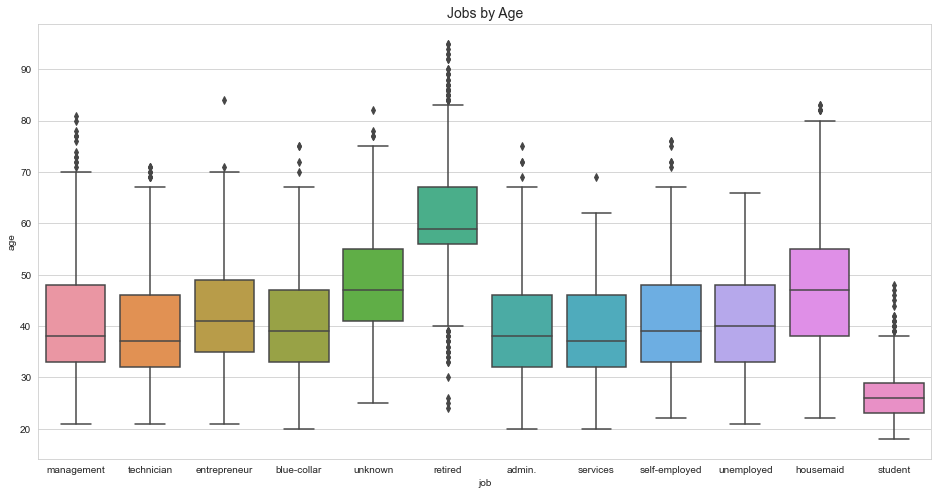

In [22]:
plt.figure(figsize=(16,8))
sns.set_style('whitegrid')
ax= sns.boxplot(x='job',y='age',data=df)
ax.set_title('Jobs by Age', fontsize = 14)

> - Retired people are mostly at the age of above 55 and most students are at the age of 20s.

In [23]:
percentsum('job')

,TotalCustumers,DepositQuantity,Ratio
job,,,
student,938,269,0.286780
retired,2264,516,0.227915
unemployed,1303,202,0.155027
management,9458,1301,0.137556
admin.,5171,631,0.122027
self-employed,1579,187,0.118429
unknown,288,34,0.118056
technician,7597,840,0.110570
services,4154,369,0.088830


#### <u>Observation</u>:
- Top contacted clients are from job type: 'blue-collar', 'management' & 'technician'
- Success rate is highest for student

In [24]:
def Job_Cate(df):
    if df['job'] == 'admin.' or df['job'] == 'blue-collar' or df['job'] == 'employed' or df['job'] == 'entrepreneur' or df['job'] == 'housemaid' or df['job'] == 'management' or df['job'] == 'services' or df['job'] == 'technician':
        return 'employed'
    elif df['job'] == 'retired':
        return 'retired'
    elif df['job'] == 'self-employed':
        return 'self-employed'
    elif df['job'] == 'student':
        return 'student'
    elif df['job'] == 'unemployed':
        return 'unemployed'
df['Job_Cate'] = df.apply(Job_Cate, axis = 1)
percentsum('Job_Cate')

,TotalCustumers,DepositQuantity,Ratio
Job_Cate,,,
student,938,269,0.286780
retired,2264,516,0.227915
unemployed,1303,202,0.155027
self-employed,1579,187,0.118429
employed,38839,4081,0.105075


#### 3.2.3. Marital status. 

married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64


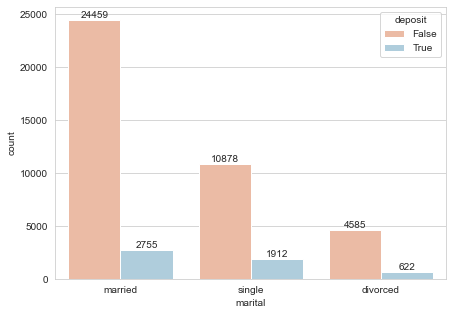

In [25]:
pdraw('marital',7,5)

Text(0.5, 1.0, 'Count Plot of marital for target variable')

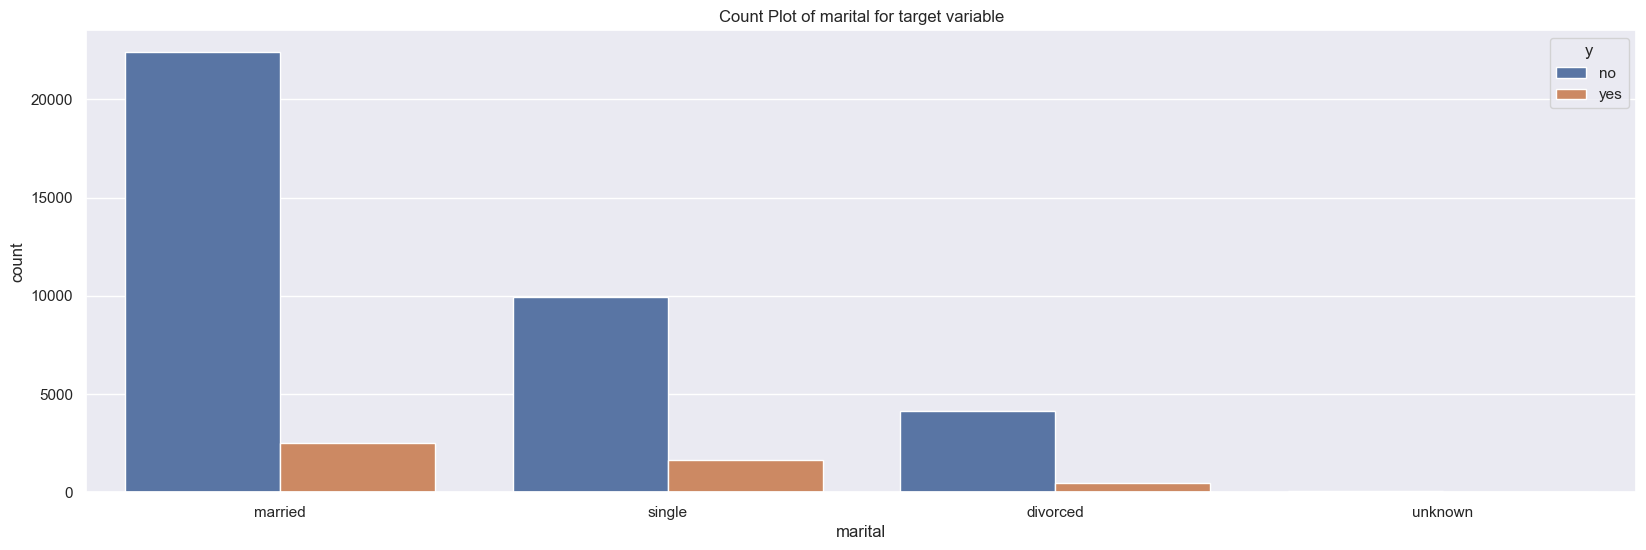

In [80]:
# analysing marital and y
sns.countplot(x=df['marital'], data=df, hue=df['y'])
plt.title('Count Plot of marital for target variable')


In [26]:
percentsum('marital')

,TotalCustumers,DepositQuantity,Ratio
marital,,,
single,12790,1912,0.149492
divorced,5207,622,0.119455
married,27214,2755,0.101235


#### <u>Observation</u>:
- The majority of customers are in married status.
- There are no apparent deposit rate differences among the 3 types of marital status.
- Single status has 3% higher ratio to do loans than married and divorced category. It seems marital status and responsibility affect the loans rate.

#### 2.3.4. Education levels. 

secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64


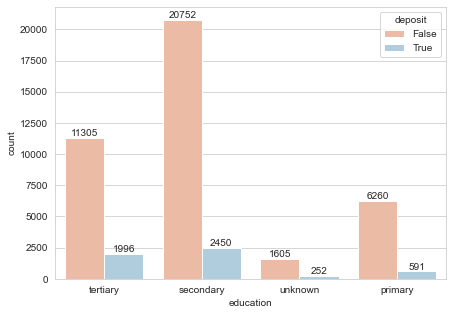

In [27]:
pdraw('education',7,5)

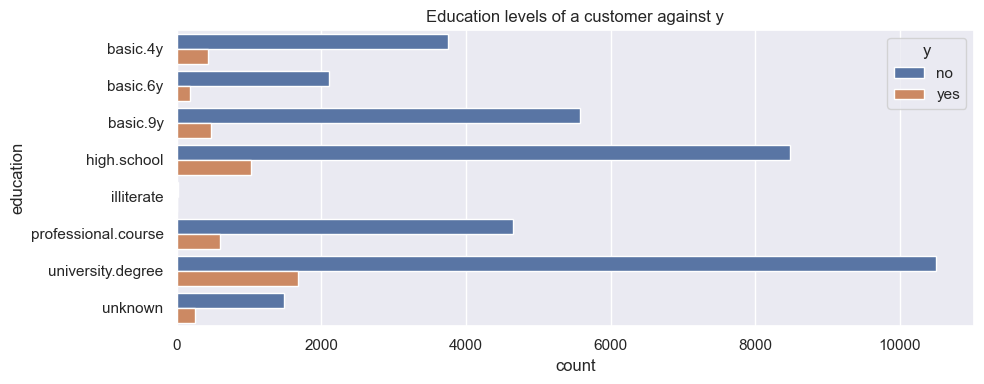

education
basic.4y               10.138875
basic.6y                5.564728
basic.9y               14.676605
high.school            23.101389
illiterate              0.043702
professional.course    12.729436
university.degree      29.542585
unknown                 4.202680
dtype: float64


In [77]:
# Analysing the different education levels of a customer against the choice of subscription

edu = pd.DataFrame(df.groupby('education').y.value_counts()).rename({'y':'count'}, axis = 1).reset_index()

plt.figure(figsize = (10,4))
plt.title('Education levels of a customer against y')
sns.barplot(x = 'count', y = 'education', hue = 'y', data = edu)
plt.tight_layout()
plt.show()
print(df.groupby(['education']).size()/len(df)*100)

In [28]:
percentsum('education')

,TotalCustumers,DepositQuantity,Ratio
education,,,
tertiary,13301,1996,0.150064
unknown,1857,252,0.135703
secondary,23202,2450,0.105594
primary,6851,591,0.086265


#### <u>Observation</u>:
- Customers with secondary education levels accounted for the highest proportion; however, tertiary is the level with the highest deposit customer percentage (15%).
- The trends go down with the lower education. So it can be assumed that the higher the education, the greater the tendency of a person to subscribe.

#### 2.3.5. Default, Housing and Loan. 

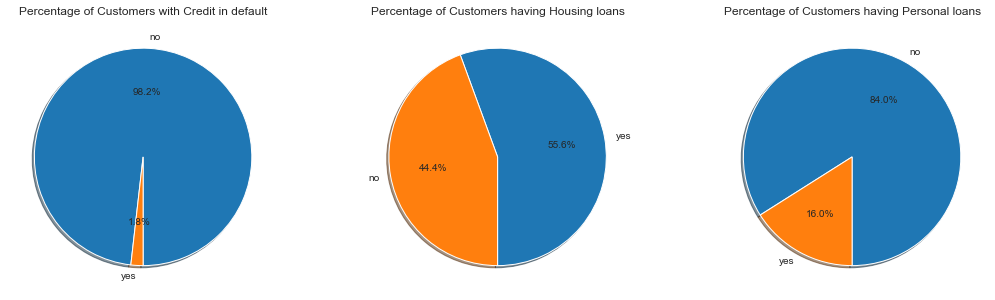

In [29]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
labels =df['default'].value_counts(sort = 'yes').index
sizes = df['default'].value_counts(sort = 'yes')
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270)
plt.title('Percentage of Customers with Credit in default',size = 12)

plt.subplot(1,3,2)
labels =df['housing'].value_counts(sort = 'yes').index
sizes = df['housing'].value_counts(sort = 'yes')
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270)
plt.title('Percentage of Customers having Housing loans',size = 12)

plt.subplot(1,3,3)
labels =df['loan'].value_counts(sort = 'yes').index
sizes = df['loan'].value_counts(sort = 'yes')
plt.pie(sizes,labels=labels,autopct='%1.1f%%', shadow=True, startangle=270)
plt.title('Percentage of Customers having Personal loans',size = 12)
plt.show()

#### <u>Observation</u>:
- People with Credit in default account for the majority of the total customers (**98.2%**).

***Default and Deposit***

In [30]:
percentsum('default')

,TotalCustumers,DepositQuantity,Ratio
default,,,
no,44396,5237,0.117961
yes,815,52,0.063804


***Housing and Deposit***

In [31]:
percentsum('housing')

,TotalCustumers,DepositQuantity,Ratio
housing,,,
no,20081,3354,0.167024
yes,25130,1935,0.077000


***Loan and Deposit***

In [32]:
percentsum('loan')

,TotalCustumers,DepositQuantity,Ratio
loan,,,
no,37967,4805,0.126557
yes,7244,484,0.066814


#### <u>Observation</u>:
Customers with <b>no Credit in default</b> or <b>not having Housing loans</b> or <b>not having Personal loans</b> have <b><i>twice</b></i> the tendency of subscribing to a term deposit compared to ones with default or loans.

#### 2.3.6. Contact. 

cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: contact, dtype: float64


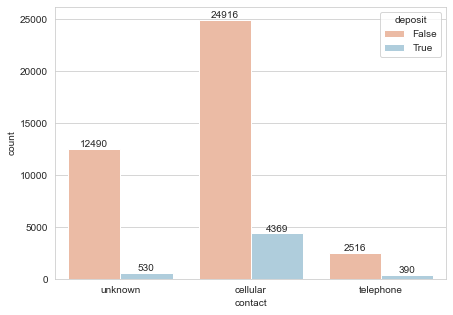

In [41]:
pdraw('contact',7,5)

Text(0.5, 1.0, 'Count plot of contact for target variable y')

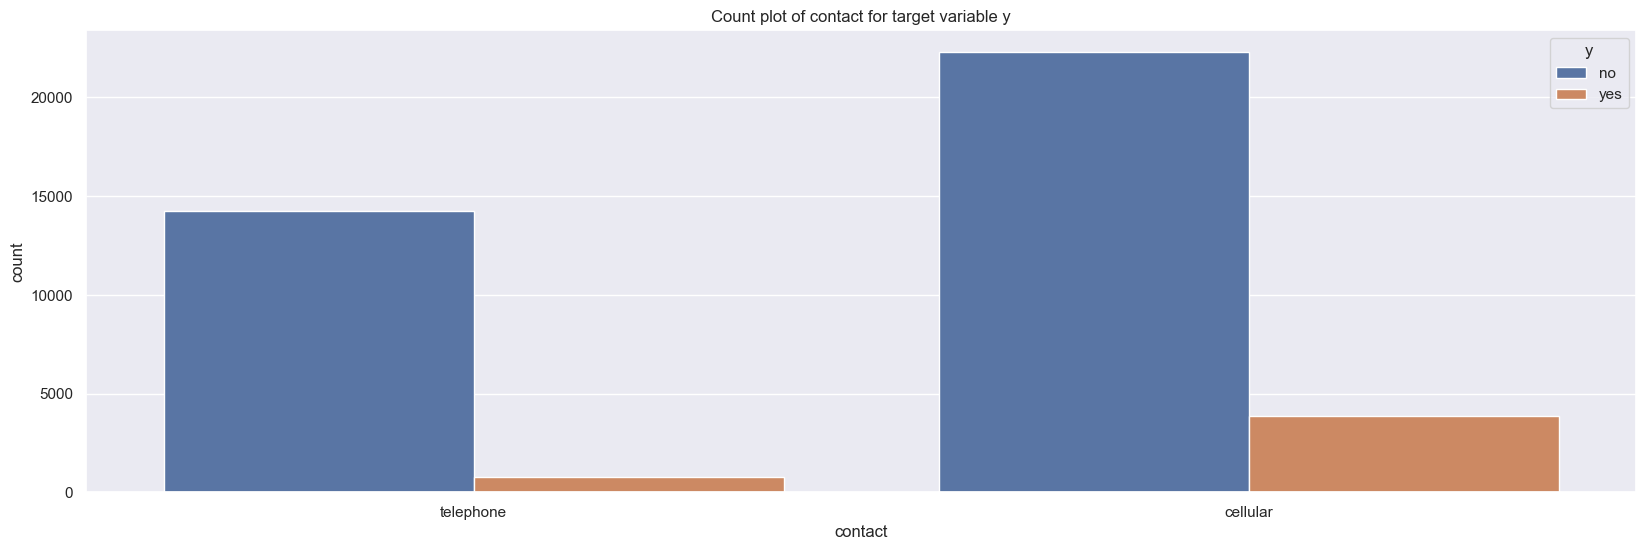

In [79]:
sns.countplot(x=df['contact'], data=df, hue=df['y'])
plt.title('Count plot of contact for target variable y')

In [42]:
percentsum('contact')

,TotalCustumers,DepositQuantity,Ratio
contact,,,
cellular,29285,4369,0.149189
telephone,2906,390,0.134205
unknown,13020,530,0.040707


#### <u>Observation</u>:
- Customers contacted by unknown contacts are more likely to not deposit, only 4% of them deposited.

#### 2.3.7. Day and Month. 

In [43]:
df['month'] = df['month'].str.capitalize()
df['day'] = df['day'].astype(str).str.zfill(2)
df['Last_contact_day'] = df['day'].astype(str) + '-' + df['month']
df['Last_contact_day']  =  pd.to_datetime(df['Last_contact_day'], format='%d-%b')
df['Last_contact_day'] = df['Last_contact_day'].dt.dayofyear

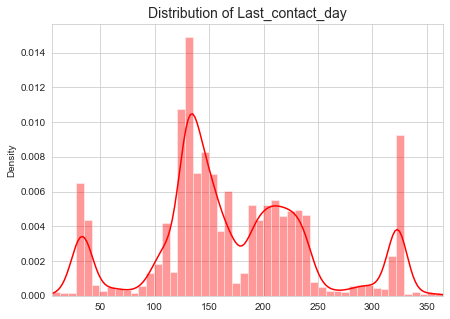

In [44]:
fig, ax1 = plt.subplots(1, figsize = (7,5))

C_date_val = df['Last_contact_day'].values

sns.distplot(C_date_val, ax=ax1, color='r')
ax1.set_title('Distribution of Last_contact_day', fontsize=14)
ax1.set_xlim([min(C_date_val), max(C_date_val)])

plt.show()

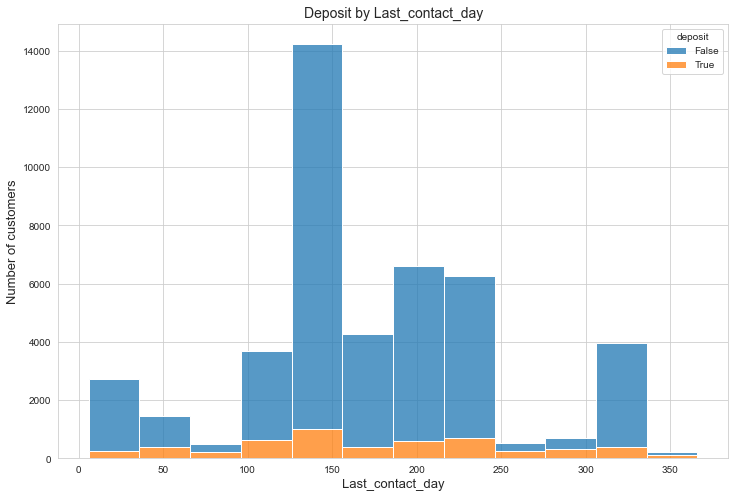

In [45]:
plt.figure(figsize=(12,8))
age_dep = sns.histplot(data = df, x = 'Last_contact_day', hue = 'deposit', multiple="stack",binwidth=30)
age_dep.set_ylabel('Number of customers', fontsize = 13)
age_dep.set_xlabel('Last_contact_day', fontsize = 13)
age_dep.set_title('Deposit by Last_contact_day', fontsize = 14)
plt.show()

In [46]:
percentsum('month')

,TotalCustumers,DepositQuantity,Ratio
month,,,
Mar,477,248,0.519916
Dec,214,100,0.467290
Sep,579,269,0.464594
Oct,738,323,0.437669
Apr,2932,577,0.196794
Feb,2649,441,0.166478
Aug,6247,688,0.110133
Jun,5341,546,0.102228
Nov,3970,403,0.101511


#### <u>Observation</u>:
- Regarding months, the highest volume of customers occurs during **May**. However, this month also saw to the lowest conversion rate, meaning the promoted customers choose to reject the subscription. Hence, the bank should reallocate resources to other months that effective rate is high, such as **March, December, September and October**. Note that the month of December requires further investigation due to small sample size. 

→ Contact time could be a potential variable to predict.

#### 2.3.8. Duration, Campaign, Pdays, and Previous. 

<AxesSubplot:xlabel='previous'>

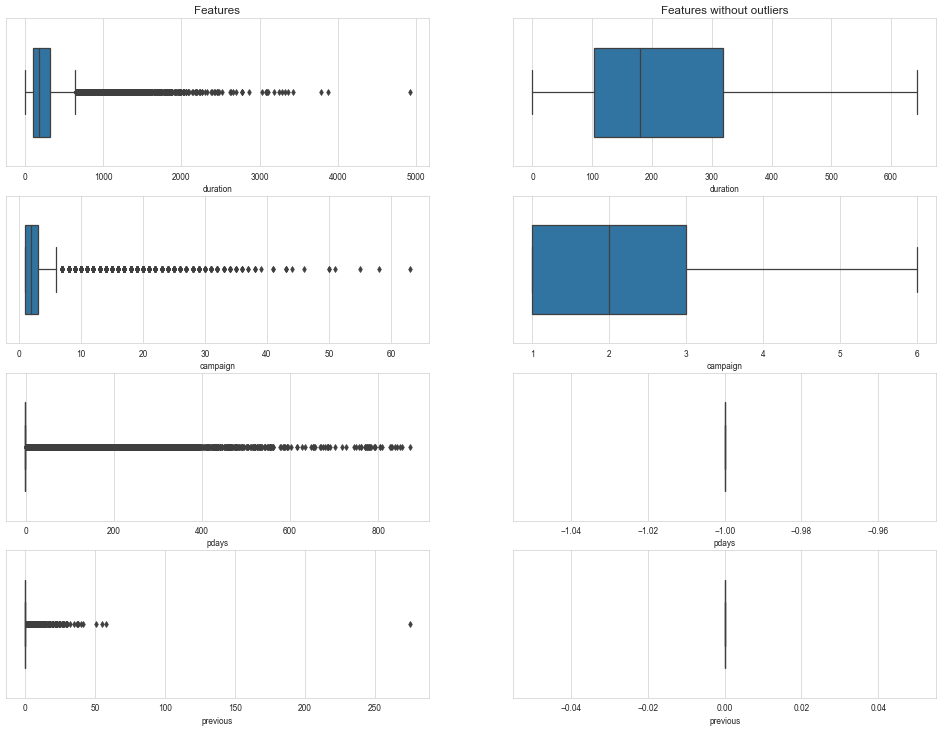

In [47]:
fig, [[ax1,ax2],[ax3,ax4],[ax5,ax6],[ax7,ax8]]= plt.subplots(ncols=2, nrows=4, figsize = (20,15), dpi=60)

sns.boxplot(df['duration'], ax=ax1, width=0.6)
ax1.set_title('Features', fontsize=14)
sns.boxplot(df['duration'], ax=ax2, width=0.6, showfliers = False)
ax2.set_title('Features without outliers', fontsize=14)
sns.boxplot(df['campaign'], ax=ax3, width=0.6)
sns.boxplot(df['campaign'], ax=ax4, width=0.6, showfliers = False)
sns.boxplot(df['pdays'], ax=ax5, width=0.6)
sns.boxplot(df['pdays'], ax=ax6, width=0.6, showfliers = False)
sns.boxplot(df['previous'], ax=ax7, width=0.6)
sns.boxplot(df['previous'], ax=ax8, width=0.6, showfliers = False)

> <p> These variables are clearly right skewed. <br>
> There are a lot of outliers for these 3 variables, which may need removing in proper way to avoid deleting removing important values. </p>

***Duration***

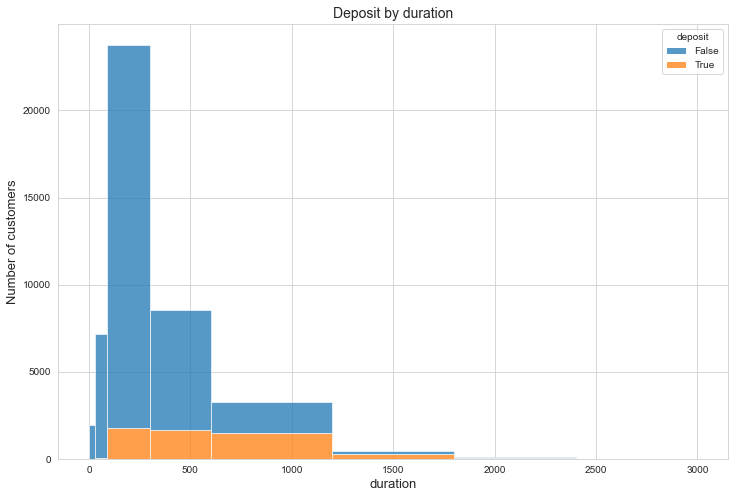

In [48]:
plt.figure(figsize=(12,8))
bins=[-1,30,90,300,600,1200,1800,2400,3000]
age_dep = sns.histplot(x = df['duration'].loc[df['duration']<=3000], hue = df['deposit'], multiple="stack",bins=bins)
age_dep.set_ylabel('Number of customers', fontsize = 13)
age_dep.set_xlabel('duration', fontsize = 13)
age_dep.set_title('Deposit by duration', fontsize = 14)
plt.show()

In [49]:
bins = [-1,30,90,300,600,1200,1800,2400,3000,4918]
labels =['0-30','30-90','90-300','300-600','600-1200','1200-1800','1800-2400','2400-3000','3000-']
df['binned_duration'] = pd.cut(df['duration'], bins,labels=labels)
percentsum('binned_duration')

,TotalCustumers,DepositQuantity,Ratio
binned_duration,,,
2400-3000,15,10,0.666667
1200-1800,453,291,0.642384
1800-2400,78,39,0.500000
600-1200,3230,1487,0.460372
3000-,14,6,0.428571
300-600,8484,1625,0.191537
90-300,23648,1762,0.074509
30-90,7279,64,0.008792
0-30,2010,5,0.002488


#### <u>Observation</u>: 
- Regarding duration, the highest volume of customers occurs with the range from **90-300**.
- The highest ratio to accept the subscription is in accordance with the range **2400-3000**. However, this duration requires further investigation due to small sample size (only **15** customer).
- There is a tendency that longer the duration is, higher probability customers decide to subscribe a term deposit, except for duration of over 3000, which seems to be outliers. 

***Campaign***

In [50]:
bins = [0,1,5,10,30,50,63]
labels =['1','2-5','6-10','11-30','31-50','51-']
df['binned_campaign'] = pd.cut(df['campaign'], bins,labels=labels)
percentsum('binned_campaign')

,TotalCustumers,DepositQuantity,Ratio
binned_campaign,,,
1,17544,2561,0.145976
2-5,23312,2475,0.106168
6-10,3159,206,0.065211
11-30,1137,46,0.040457
31-50,55,1,0.018182
51-,4,0,0.000000


#### <u>observation</u>:
- From the statistics, we can conclude that less contacts during the campaign, higher probability customers subscribe a term deposit.

#### 2.3.11. Poutcome. 

In [53]:
df['poutcome'] = df['poutcome'].replace(['unknown'], 'other')

other      0.858176
failure    0.108403
success    0.033421
Name: poutcome, dtype: float64


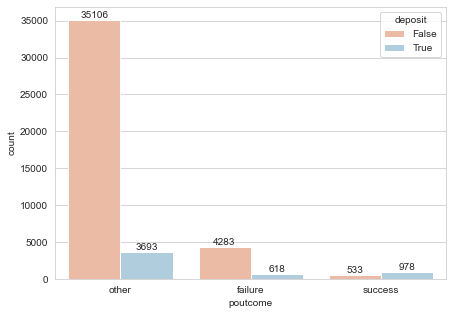

In [54]:
pdraw('poutcome',7,5)

In [55]:
percentsum('poutcome')

,TotalCustumers,DepositQuantity,Ratio
poutcome,,,
success,1511,978,0.647253
failure,4901,618,0.126097
other,38799,3693,0.095183


#### <u>Observation</u>:
- The outcome of the previous campaign has an influential impact on the current one while the successful previous campaign will lead to a higher percentage of customers who accept the subscription for a term deposit.


### 2.4. Recommendation. <a id="2.4"></a>

- The 'poutcome' - outcome of the previous marketing campaign has the greatest influence on the current campaign's outcome.

- Whether or not the customer has housing loan and personal loan could greatly affect the campaign's outcome as well.

- The customers occupation and 'maritial' status are also among the factors that significantly impact the results.

- The 'duration' of the last contact is also important for our prediction and it is the most important feature while 'education' is the least important feature.

- 'Month' of May have seen the highest number of clients contacted but have the least success rate. Highest success rate is observed for end month of the financial year as well as the calendar year. So one can say that our dataset have some kind of seasonality.

- When visualized 'age' in groups, it is found that clients with age less than 30 and greater than 60 are less contacted through the campaign but have a higher success rate.

## 3. Model Development <a class="anchor" id="3"></a>

From the <b>above mentioned potential features</b> in the EDA part, we have the model development with the following variables:
 - age
 - job
 - marital
 - education
 - default
 - balance
 - housing
 - loan
 - Last_contact_day
 - duration
 - campaign
 - pdays
 - previous
 - poutcome

### 3.1. Preprocessing. <a id="3.1"></a>

In [56]:
import copy
df_copy = copy.deepcopy(df)

In [57]:
df_copy.loc[(df_copy['job'] == 'unknown') & (df_copy['age'] >= 60), "job"] = 'retired'
df_copy.loc[(df_copy['job'] == 'unknown') & (df_copy['age'] < 60), "job"] = 'blue-collar'

df_copy['Job_Cate'].fillna('employed', inplace=True)
df_copy['job'].replace(['unknown'], 'blue-collar', inplace=True)

df_copy['education'].replace('unknown', 'secondary', inplace=True)
df_copy['education'].replace('primary', 1, inplace=True)
df_copy['education'].replace('secondary', 2, inplace=True)
df_copy['education'].replace('tertiary', 3, inplace=True)

In [58]:
# Drop outliners
df_copy.drop(df_copy[(df_copy['duration']>3000)].index, inplace = True)
df_copy = df_copy.reset_index(drop= True)

In [59]:
# Drop unnecessary columns 
df_copy.drop(['Generations', 'day', 'month', 'Age Group', 'Job_Cate', 'Balance_Cate', 'binned_duration', 'binned_campaign', 'binned_pdays', 'binned_previous','contact'], axis=1, inplace=True)
df_copy

,deposit,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,Last_contact_day
0,False,58,management,married,3,no,2143,yes,no,261,1,-1,0,other,125
1,False,44,technician,single,2,no,29,yes,no,151,1,-1,0,other,125
2,False,33,entrepreneur,married,2,no,2,yes,yes,76,1,-1,0,other,125
3,False,47,blue-collar,married,2,no,1506,yes,no,92,1,-1,0,other,125
4,False,33,blue-collar,single,2,no,1,no,no,198,1,-1,0,other,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45192,True,51,technician,married,3,no,825,no,no,977,3,-1,0,other,321
45193,True,71,retired,divorced,1,no,1729,no,no,456,2,-1,0,other,321
45194,True,72,retired,married,2,no,5715,no,no,1127,5,184,3,success,321
45195,False,57,blue-collar,married,2,no,668,no,no,508,4,-1,0,other,321


#### One-hot encode categorical features

In [60]:
encoder = OneHotEncoder(drop='if_binary', sparse=False)
dic1 = encoder.fit_transform(df_copy[['job', 'marital', 'default', 'housing', 'loan', 'poutcome']])

In [61]:
lst = encoder.get_feature_names_out(['job', 'marital', 'default', 'housing', 'loan', 'poutcome']) 
out = pd.DataFrame(dic1, columns=lst)
out.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,default_yes,housing_yes,loan_yes,poutcome_failure,poutcome_other,poutcome_success
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [62]:
df_dummies = pd.concat([df_copy, out], axis=1)
df_dummies['deposit']=df_dummies['deposit'].map({False:0,True:1})
df_dummies.head()

,deposit,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,Last_contact_day,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,default_yes,housing_yes,loan_yes,poutcome_failure,poutcome_other,poutcome_success
0,0,58,management,married,3,no,2143,yes,no,261,1,-1,0,other,125,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0,44,technician,single,2,no,29,yes,no,151,1,-1,0,other,125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0,33,entrepreneur,married,2,no,2,yes,yes,76,1,-1,0,other,125,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0,47,blue-collar,married,2,no,1506,yes,no,92,1,-1,0,other,125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0,33,blue-collar,single,2,no,1,no,no,198,1,-1,0,other,125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Removal of unnecessary variables

In [63]:
df_dummies.drop(['job', 'marital', 'default', 'housing', 'loan', 'poutcome'], inplace = True, axis = 1)
df_dummies

,deposit,age,education,balance,duration,campaign,pdays,previous,Last_contact_day,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,default_yes,housing_yes,loan_yes,poutcome_failure,poutcome_other,poutcome_success
0,0,58,3,2143,261,1,-1,0,125,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0,44,2,29,151,1,-1,0,125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0,33,2,2,76,1,-1,0,125,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0,47,2,1506,92,1,-1,0,125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0,33,2,1,198,1,-1,0,125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45192,1,51,3,825,977,3,-1,0,321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
45193,1,71,1,1729,456,2,-1,0,321,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
45194,1,72,2,5715,1127,5,184,3,321,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
45195,0,57,2,668,508,4,-1,0,321,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### 3.2. Model Building. <a id="3.2"></a>

The target value is "deposit", a "Yes/No" variable. Therefore, Classification predictive models or Binary Classification Algorithms are suitable for developing the models.<br>
In this report, the authors decided to use some popular models, which are:
- Logistic Regression.
- Decision Trees.
- Random Forest.
- Extreme Gradient Boosting.

In [64]:
def metrics_scoring_table(y_model,y_true, y_proba, model_name):
    prec = precision_score(y_true, y_model)
    accu = accuracy_score( y_true, y_model)
    recall = recall_score(y_true, y_model)
    f1 = f1_score(y_true, y_model)
    roc = roc_auc_score(y_true, y_proba[:, 1])
    df_score = pd.DataFrame(data= {
    "model" :  model_name,
    "accuracy score": accu,
    "precision score": prec,
    "recall score": recall,
    "f1-score": f1,
    "ROC-AUC": roc
    },
    index = [0]
    )
    return df_score

In [65]:
def roc_curve_plot(Y_pred, Y_true, Y_pred_pobablities, model_name):
    Y_pp = Y_pred_pobablities[:, 1]
    fpr, tpr, threshold1 = roc_curve(Y_true, Y_pp )
    
    fig, ax = plt.subplots(nrows=1, ncols= 1, figsize = (7,5), constrained_layout = True)
    ax.plot(fpr, tpr, label='ROC Score: {:.5f}'.format(roc_auc_score(Y_true, Y_pp)))
    ax.set_title(f"{model_name} ROC Curve ", fontdict = {"fontsize": 18})
    ax.set_xlabel("False Positive Rate", fontdict = {"fontsize": 15} )
    ax.set_ylabel("True Positive Rate", fontdict = {"fontsize": 15})
    ax.legend(loc = 4, fontsize = 14 )

    plt.show()
    

In [66]:
def roc_summary_plot(Y_true, Y_probability = [], model_name = []):
    for i in range(len(Y_probability)):
        fpr, tpr, threshold1 = roc_curve(Y_true,Y_probability[i][:,1] )
        plt.style.use("seaborn-white")
        plt.figure( num = 1, figsize = (12, 9))
        plt.title("ROC scores summary", fontsize = 18)
        plt.xlabel("False Positive Rate" , fontdict = {"fontsize": 15})
        plt.ylabel("True Positive Rate" , fontdict = {"fontsize": 15})
        plt.plot(fpr, tpr, label='{0} ROC Score: {1}'.format(model_name[i] ,round(roc_auc_score(Y_true, Y_probability[i][:,1] ) ,2)))
        plt.legend(loc = 4, fontsize =13)
    plt.show()

> ROC Curve (Receiver Operating Characteristic):
The ROC curve tells us how well our classifier is classifying between term deposit suscriptions (True Positives) and non-term deposit suscriptions. The X-axis is represented by False positive rates (Specificity) and the Y-axis is represented by the True Positive Rate (Sensitivity.) As the line moves the threshold of the classification changes giving us different values. The closer is the line to our top left corner the better is our model separating both classes.

In [67]:
X = df_dummies.drop('deposit', axis=1)
Y = df_dummies['deposit']

#### Splitting the dataset into the Training set and Test set.

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1, stratify = Y)

#### Oversampling.

In [69]:
SM = SMOTE(sampling_strategy = 1, k_neighbors= 5)

In [70]:
X_train, Y_train = SM.fit_resample(X_train, Y_train)

#### Multicollinearity Detecting.

<AxesSubplot:>

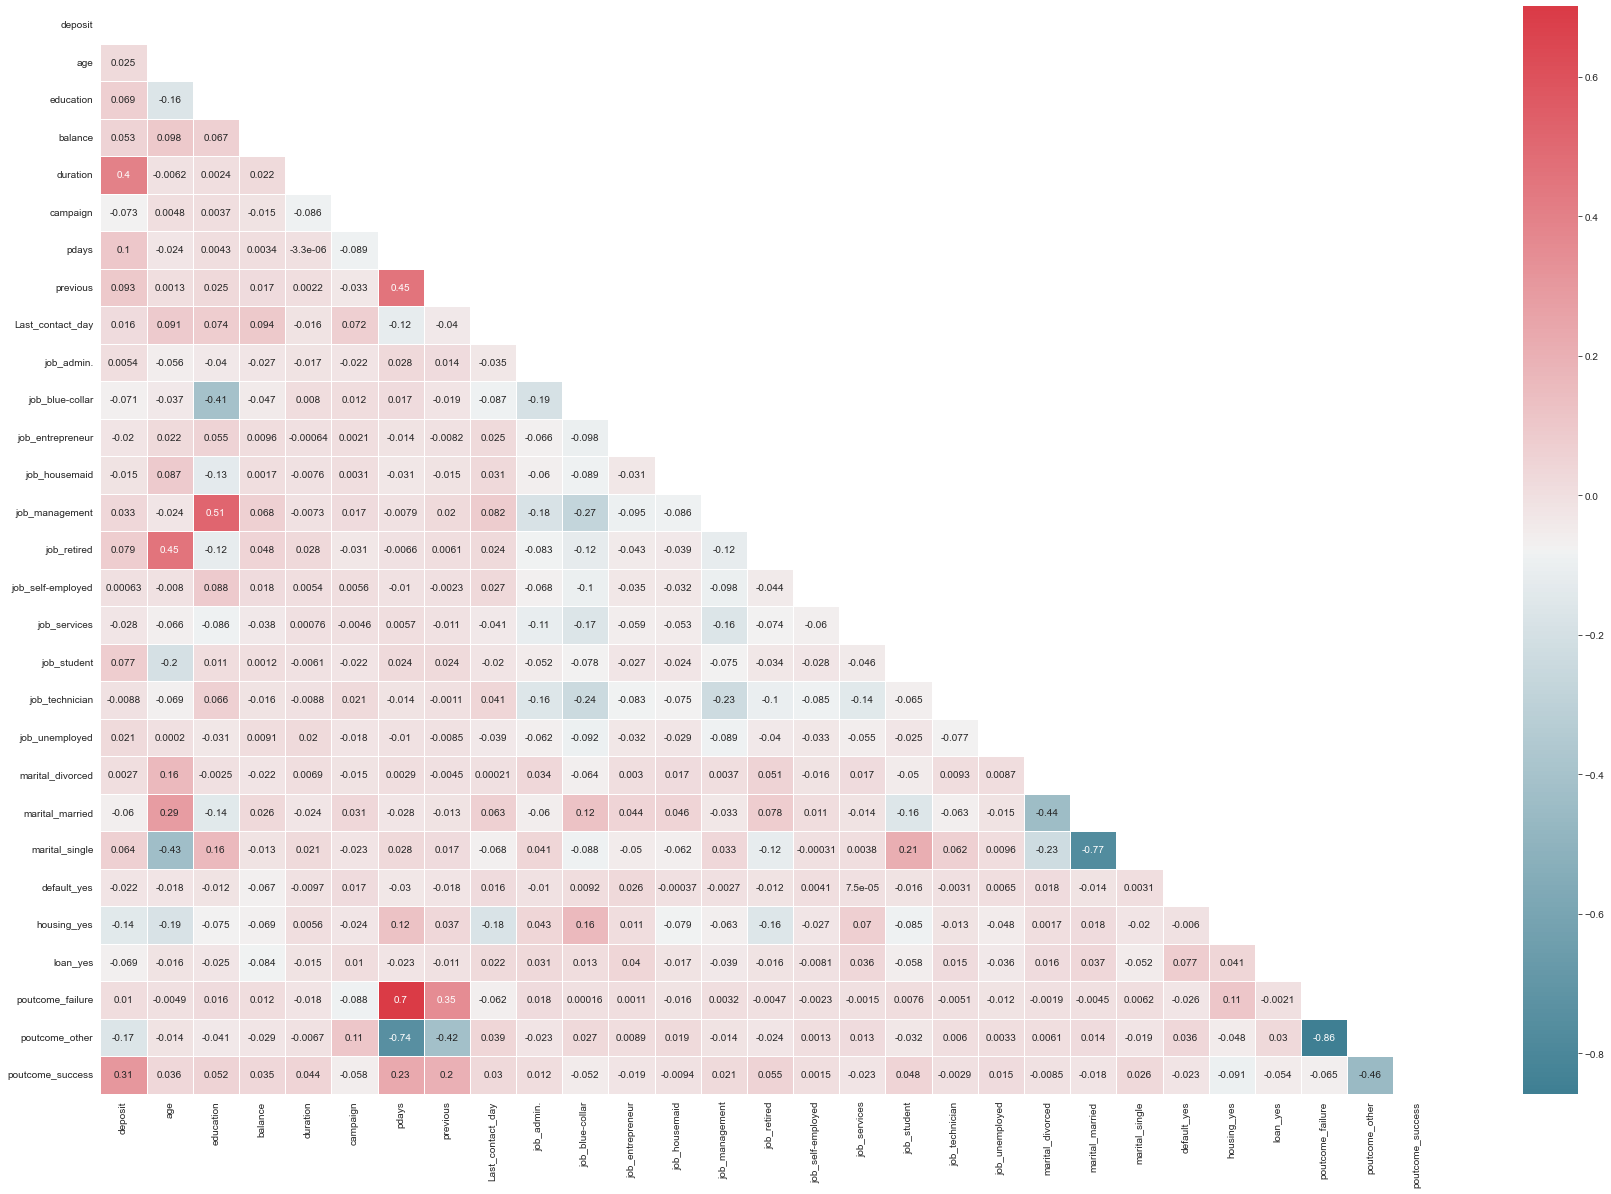

In [71]:
fig, ax = plt.subplots(figsize=(30, 20))
corr = df_dummies.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, annot = True, linewidth=.8, cmap=cmap, mask=mask)

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_check = df_dummies.drop('deposit', axis=1)

vif_results = pd.DataFrame()
vif_results['Feature'] = vif_check.columns

vif_results['VIF'] = [variance_inflation_factor(vif_check.values, i) for i in range(len(vif_check.columns))]
vif_results.loc[vif_results['VIF']<=5].sort_values(by = 'VIF', ascending=False)

,Feature,VIF
5,pdays,2.522079
1,education,1.714804
0,age,1.674702
6,previous,1.289736
23,housing_yes,1.158431
7,Last_contact_day,1.079812
2,balance,1.039848
24,loan_yes,1.028272
4,campaign,1.027598
22,default_yes,1.013384


In [73]:
cond = vif_results['VIF'] <= 5
selected_log = vif_results.loc[cond]['Feature'].tolist()
selected_log

['age',
 'education',
 'balance',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'Last_contact_day',
 'default_yes',
 'housing_yes',
 'loan_yes']

> ***These above features will be used to develop models that are heavily affected by Multicollinearity.***

#### 3.2.1. Logistic Regression.

In [74]:
X_train_log = copy.deepcopy(X_train)
X_test_log = copy.deepcopy(X_test)

In [75]:
sc = StandardScaler()

X_train_log[selected_log] = sc.fit_transform(X_train_log[selected_log])
X_test_log[selected_log] = sc.transform(X_test_log[selected_log])

In [76]:
logr = LogisticRegression(max_iter= 1000)
logr.fit(X_train_log[selected_log], Y_train)

logr_Y_pred = logr.predict(X_test_log[selected_log])
logr_Y_proba = logr.predict_proba(X_test_log[selected_log])

In [77]:
metrics_scoring_table(logr_Y_pred,Y_test, logr_Y_proba, "LogisticRegression")

,model,accuracy score,precision score,recall score,f1-score,ROC-AUC
0,LogisticRegression,0.803872,0.345423,0.756859,0.474355,0.856259


#### 3.2.2. Decision Tree.

In [78]:
dt = DecisionTreeClassifier()

dt.fit(X_train, Y_train)

dt_Y_pred = dt.predict(X_test)
dt_Y_proba = dt.predict_proba(X_test)

In [79]:
metrics_scoring_table(dt_Y_pred,Y_test, dt_Y_proba, "Decision Tree")

,model,accuracy score,precision score,recall score,f1-score,ROC-AUC
0,Decision Tree,0.86792,0.44059,0.480605,0.459729,0.699904


#### 3.2.3. Random Forest

In [80]:
rf = RandomForestClassifier()

rf.fit(X_train, Y_train)

rf_Y_pred = rf.predict(X_test)
rf_Y_proba = rf.predict_proba(X_test)

In [81]:
metrics_scoring_table(rf_Y_pred,Y_test, rf_Y_proba, "RandomForest")

,model,accuracy score,precision score,recall score,f1-score,ROC-AUC
0,RandomForest,0.899558,0.604782,0.406812,0.486425,0.915407


#### 3.2.4. XGB Classifier.

In [82]:
XGB = XGBClassifier()

XGB.fit(X_train, Y_train)

XGB_Y_pred = XGB.predict(X_test)
XGB_Y_proba = XGB.predict_proba(X_test)

In [83]:
metrics_scoring_table(XGB_Y_pred,Y_test, XGB_Y_proba, "XGBClassifier")

,model,accuracy score,precision score,recall score,f1-score,ROC-AUC
0,XGBClassifier,0.904425,0.608305,0.512772,0.556468,0.92966


#### Model Summary.

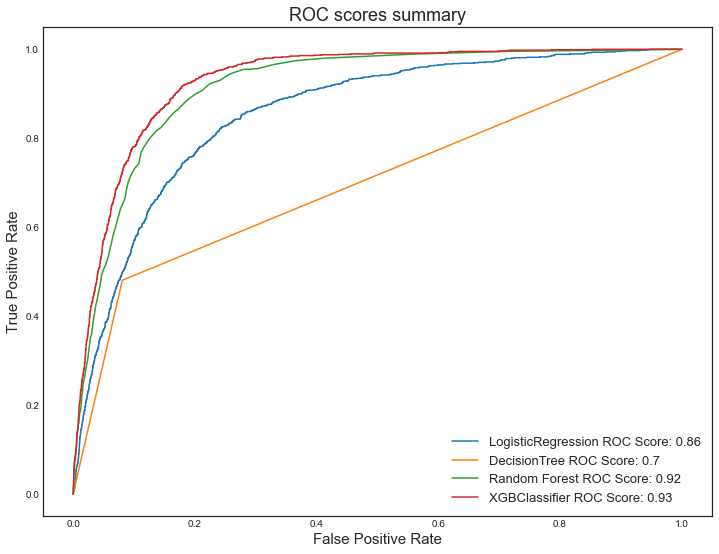

In [84]:
roc_summary_plot(Y_test, [logr_Y_proba, dt_Y_proba, rf_Y_proba, XGB_Y_proba],
                         ["LogisticRegression", "DecisionTree" ,"Random Forest", "XGBClassifier"])

In [85]:
score_1 = metrics_scoring_table(logr_Y_pred,Y_test, logr_Y_proba ,"LogisticRegression")
score_2 = metrics_scoring_table(dt_Y_pred,Y_test, dt_Y_proba ,"Decision Tree")
score_3 = metrics_scoring_table(rf_Y_pred,Y_test, rf_Y_proba ,"RandomForest")
score_4 = metrics_scoring_table(XGB_Y_pred,Y_test, XGB_Y_proba ,"XGBClassifier")
score = pd.concat([score_1,score_2,score_3,score_4], axis=0)
score

,model,accuracy score,precision score,recall score,f1-score,ROC-AUC
0,LogisticRegression,0.803872,0.345423,0.756859,0.474355,0.856259
0,Decision Tree,0.867920,0.440590,0.480605,0.459729,0.699904
0,RandomForest,0.899558,0.604782,0.406812,0.486425,0.915407
0,XGBClassifier,0.904425,0.608305,0.512772,0.556468,0.929660


#### <u>Observation</u>: 
We prefer to choose 2 models which have the highest F1-score and ROC score: <b>RandomForest</b> and <b>XGBClassifier</b> to continue tuning.

### 3.3. Model Tuning. <a id="3.3"></a>

#### 3.3.1. Random Forest.

In [86]:
CV = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [87]:
RF_tuned = RandomForestClassifier()
grid_RF_params = {'n_estimators': np.arange(82, 90, 1), 
                  'criterion' : [ 'entropy'], 
                  'max_depth': np.arange(1,3,1), 
                  'max_features': ['sqrt']}
grid_RF_cv = GridSearchCV(RF_tuned, grid_RF_params, scoring = 'roc_auc', refit = True, cv=CV, verbose=1)  
grid_RF_cv.fit(X_train, Y_train) 

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': array([1, 2]),
                         'max_features': ['sqrt'],
                         'n_estimators': array([82, 83, 84, 85, 86, 87, 88, 89])},
             scoring='roc_auc', verbose=1)

In [88]:
best_RF = grid_RF_cv.best_estimator_
best_RF.fit(X_train, Y_train)
best_rf_Y_pred = best_RF.predict(X_test)
best_rf_Y_proba = best_RF.predict_proba(X_test)

In [89]:
metrics_scoring_table(best_rf_Y_pred, Y_test, best_rf_Y_proba, "RandomForest")

,model,accuracy score,precision score,recall score,f1-score,ROC-AUC
0,RandomForest,0.840265,0.392321,0.666982,0.494043,0.865334


#### 3.3.2. XGB Classifier.

In [90]:
xgb_model = XGBClassifier()
XGB_parameters = {
    'n_estimators': [100, 400],
    'max_depth': [3, 6],
    'learning_rate': [0.05, 0.20],
    'min_child_weight': [1, 10]
       }
grid_XGB_cv = GridSearchCV(xgb_model, XGB_parameters, cv=CV, scoring='roc_auc', verbose=1 , refit=True)
grid_XGB_cv.fit(X_train, Y_train) 

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_c...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                         

In [91]:
best_XGB = grid_XGB_cv.best_estimator_
best_XGB.fit(X_train, Y_train)
best_XGB_Y_pred = best_XGB.predict(X_test)
best_XGB_Y_proba = best_XGB.predict_proba(X_test)

In [92]:
metrics_scoring_table(best_XGB_Y_pred, Y_test, best_XGB_Y_proba, "XGBClassifier")

,model,accuracy score,precision score,recall score,f1-score,ROC-AUC
0,XGBClassifier,0.907854,0.626126,0.526017,0.571722,0.926621


#### Model summary after tuning.

In [93]:
tune_score_1 = metrics_scoring_table(best_rf_Y_pred, Y_test, best_rf_Y_proba ,"RandomForest")
tune_score_2 = metrics_scoring_table(best_XGB_Y_pred, Y_test, best_XGB_Y_proba ,"XGBClassifier")
tune_score = pd.concat([tune_score_1,tune_score_2], axis=0)
tune_score

,model,accuracy score,precision score,recall score,f1-score,ROC-AUC
0,RandomForest,0.840265,0.392321,0.666982,0.494043,0.865334
0,XGBClassifier,0.907854,0.626126,0.526017,0.571722,0.926621


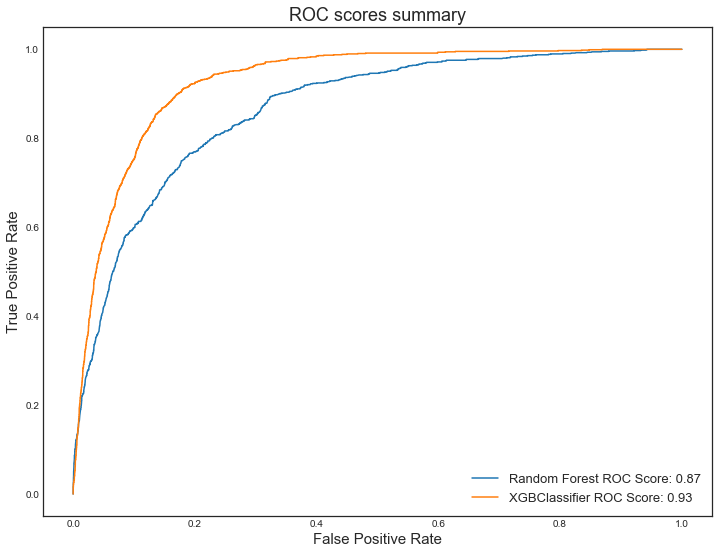

In [94]:
roc_summary_plot(Y_test, [best_rf_Y_proba, best_XGB_Y_proba],
                         ["Random Forest", "XGBClassifier"])

#### <u>Observation</u>: 
- Model <b>XGBClassifier</b> had the highest values of both ROC and F1-score.

## CONCLUSION AND RECOMMENDATIONS <a class="anchor" id="4"></a>

[0.00309837 0.00285168 0.00290929 0.03035414 0.00803795 0.00425978
 0.0030549  0.00798991 0.03909837 0.07299612 0.01263721 0.01418495
 0.05223762 0.04322445 0.02130388 0.03308867 0.04390889 0.05172633
 0.01496848 0.0257564  0.07239579 0.03025593 0.00297124 0.15397933
 0.05405908 0.0100192  0.01093272 0.17769946]


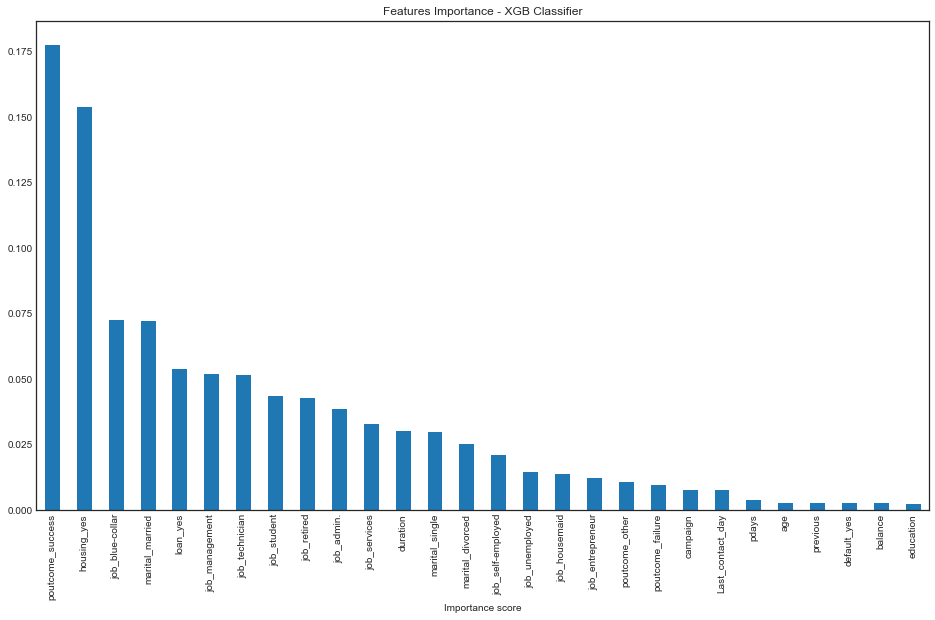

In [95]:
print(best_XGB.feature_importances_)
# plot graph of feature importances for better visualization
feat_importances = pd.Series(best_XGB.feature_importances_, index=X.columns)
plt.figure(figsize=(16, 9))
feat_importances.nlargest(len(best_XGB.feature_importances_)).plot(kind='bar')
plt.xlabel('Importance score')
plt.title('Features Importance - XGB Classifier')
plt.show()

The above figure shows the importance of each independent variables towards the target one using the model giving the best results out of the models the authors had built, <b>XGBClassifier</b>.